# Project Description:

A project from Medical domain. The dataset created by Max Little of the University of Oxford in collaboration with the National Centre for Voice and Speech, Denver, Colorado, is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease.

# Context:

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The dataset is extracted from the paper: 'Exploiting NonLinear Recurrence and Fractual Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering Online 2007, 6:23 (23 June, 2007)

# Data Description:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

The columns are as follows:

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%)**, **MDVP:Jitter(Abs)**, **MDVP:RAP**, **MDVP:PPQ**, **Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer**, **MDVP:Shimmer(dB)**, **Shimmer:APQ3**, **Shimmer:APQ5**, **MDVP:APQ**, **Shimmer:DDA** - Several measures of variation in amplitude

**NHR**, **HNR** - Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE**, **D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

**spread1**, **spread2**, **PPE** - Three nonlinear measures of fundamental frequency variation.

# Objective:

The goal is to classify the patients into the respective labels using the attributes from their voice recordings.

### Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from os import system
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import tree

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Load the dataset

In [ ]:
parkinson_data = pd.read_csv('/content/drive/MyDrive/0.Latest_DS_Course/Ensemble/3.Stacking/Data - Parkinsons')

In [ ]:
parkinson_data.to_csv("park.csv")

### 2. Eye-balling the raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

One of the biggest challenge in the dataset according to me is understanding the each and every attributes clearly i.e., what the attributes mean. The attributes are heavily doused with medical terms, which makes it quite difficult to understand what each attributes mean without having sufficient domain knowledge.

#### Shape of the data

In [ ]:
parkinson_data.shape

(195, 24)

The two-dimensional dataframe i.e., parkinson_data consists of 195 rows and 24 columns.

#### Dataframe of each attribute

In [ ]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
parkinson_data.to_excel("test.xlsx")

All the attributes apart from **name** contains numerical values.

#### To check presence of missing values

In [ ]:
parkinson_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


None of the columns have null values.

#### Finding unique value in each attribute

In [ ]:
parkinson_data.apply(lambda x: len(x.unique()))

,0
name,195
MDVP:Fo(Hz),195
MDVP:Fhi(Hz),195
MDVP:Flo(Hz),195
MDVP:Jitter(%),173
MDVP:Jitter(Abs),19
MDVP:RAP,155
MDVP:PPQ,165
Jitter:DDP,180
MDVP:Shimmer,188


As informed in the **Data Description** section mentioned above, we can see that apart from the attribute **status**, every other attribute has continuous values.

As attribute **name** is not useful for this analysis we can make it as index.

In [ ]:
parkinson_data = parkinson_data.set_index('name')
parkinson_data.head().T

name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992000,122.400000,116.682000,116.676000,116.014000
MDVP:Fhi(Hz),157.302000,148.650000,131.111000,137.871000,141.781000
MDVP:Flo(Hz),74.997000,113.819000,111.555000,111.366000,110.655000
MDVP:Jitter(%),0.007840,0.009680,0.010500,0.009970,0.012840
MDVP:Jitter(Abs),0.000070,0.000080,0.000090,0.000090,0.000110
MDVP:RAP,0.003700,0.004650,0.005440,0.005020,0.006550
MDVP:PPQ,0.005540,0.006960,0.007810,0.006980,0.009080
Jitter:DDP,0.011090,0.013940,0.016330,0.015050,0.019660
MDVP:Shimmer,0.043740,0.061340,0.052330,0.054920,0.064250
MDVP:Shimmer(dB),0.426000,0.626000,0.482000,0.517000,0.584000


### 3. Using univariate & bivariate analysis to check the individual attributes for their basic statisitics such as central values, spread, tails, relationships between variables etc.

#### 5 point summary of numerical attributes

In [ ]:
parkinson_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


The numerical attributes are summarised in the following manner:

i. **MDVP:Fo(Hz)**: There are 195 records with a mean value of 154.23 Hz. The minimum and maximum frequency recorded by the individuals are 88.33 Hz and 260.11 Hz respectively. 25% of people have an average vocal fundamental frequency under 117.57 Hz, 50% of people have an average vocal fundamental frequency under 148.79 Hz whereas 75% of people have an average vocal fundamental frequency under 182.77 Hz. Also, the observations differ from the mean value by 41.39 Hz

ii. **MDVP:Fhi(Hz)**: There are 195 records with a mean value of 197.10 Hz. The greatest minimum and maximum frequency recorded over period-to-period by the individuals are 102.15 Hz and 592.03 Hz respectively. For 25% of the observed people the value is under 134.86 Hz, for 50% of people it is under 175.83 Hz whereas for 75% of people it is under 224.21 Hz. Also, the observations differ from the mean value by 91.49 Hz

iii. **MDVP:Flo(Hz)**: There are 195 records with a mean value of 116.32 Hz. The lowest minimum and maximum frequency recorded over period-to-period by the individuals are 65.48 Hz and 239.17 Hz respectively. For 25% of the observed people the value is under 84.29 Hz, for 50% of people it is under 104.32 Hz whereas for 75% of people it is under 140.02 Hz. Also, the observations differ from the mean value by 43.52 Hz

iv. **MDVP:Jitter(%)**: There are 195 records with a mean value of 0.0062%. The minimum and maximum value recorded for the observed individuals are 0.00168% and 0.03316% respectively. For 25% of the observed people the value is under 0.00346%, for 50% of people it is under 0.00494% whereas for 75% of people it is under 0.007365%. Also, the observations differ from the mean value by 0.0049%

v. **MDVP:Jitter(Abs)**: There are 195 records with a mean value of 0.000044. The minimum and maximum variablitity of the pitch within the analyzed voice sample for the observed individuals are 0.000007 and 0.00026 respectively. For 25% of the observed people the value is under 0.00002, for 50% of people it is under 0.00003 whereas for 75% of people it is under 0.00006. Also, the observations differ from the mean value by 0.000035

vi. **MDVP:RAP**: There are 195 records with a mean value of 0.003306. The minimum and maximum variablitity of the pitch within the analyzed voice sample with a smoothing factor (of 3 periods) for the observed individuals are 0.00068 and 0.021440 respectively. For 25% of the observed people the value is under 0.00166, for 50% of people it is under 0.0025 whereas for 75% of people it is under 0.003835. Also, the observations differ from the mean value by 0.002968

vii. **MDVP:PPQ**: There are 195 records with a mean value of 0.003446. The minimum and maximum variablitity of the pitch within the analyzed voice sample with a smoothing factor (of 5 periods) for the observed individuals are 0.00092 and 0.01958 respectively. For 25% of the observed people the value is under 0.00186, for 50% of people it is under 0.00269 whereas for 75% of people it is under 0.003955. Also, the observations differ from the mean value by 0.002759

viii. **Jitter:DDP**: There are 195 records with a mean value of 0.00992. For the observed persons it ranges from 0.00204 to 0.06433. For 25% of the observed people the value is under 0.004985, for 50% of people it is under 0.00749 whereas for 75% of people it is under 0.011505. Also, the observations differ from the mean value by 0.008903

ix. **MDVP:Shimmer**: There are 195 records with a mean value of 0.0297. For the observed persons it ranges from 0.00954 to 0.11908. For 25% of the observed people the value is under 0.016505, for 50% of people it is under 0.02297 whereas for 75% of people it is under 0.037885. Also, the observations differ from the mean value by 0.018857

x. **MDVP:Shimmer(dB)**: There are 195 records with a mean value of 0.28 dB. For the observed persons it ranges from 0.085 dB to 1.302 dB. For 25% of the observed people the value is under 0.149 dB, for 50% of people it is under 0.221 dB whereas for 75% of people it is under 0.35 dB. Also, the observations differ from the mean value by 0.195 dB

xi. **Shimmer:APQ3**: There are 195 records with a mean value of 0.015664. For the observed persons it ranges from 0.00455 to 0.05647. For 25% of the observed people the value is under 0.008245, for 50% of people it is under 0.01279 whereas for 75% of people it is under 0.020265. Also, the observations differ from the mean value by 0.010153

xii. **Shimmer:APQ5**: There are 195 records with a mean value of 0.017878. For the observed persons it ranges from 0.0057 to 0.0794. For 25% of the observed people the value is under 0.00958, for 50% of people it is under 0.01347 whereas for 75% of people it is under 0.02238. Also, the observations differ from the mean value by 0.012024

xiii. **MDVP:APQ**: There are 195 records with a mean value of 0.024081. For the observed persons it ranges from 0.00719 to 0.13778. For 25% of the observed people the value is under 0.01308, for 50% of people it is under 0.01826 whereas for 75% of people it is under 0.0294. Also, the observations differ from the mean value by 0.016947

xiv. **Shimmer:DDA**: There are 195 records with a mean value of 0.046993. For the observed persons it ranges from 0.01364 to 0.16942. For 25% of the observed people the value is under 0.024735, for 50% of people it is under 0.03836 whereas for 75% of people it is under 0.060795. Also, the observations differ from the mean value by 0.030459

xv. **NHR**: There are 195 records with a mean value of 0.024847. For the observed persons it ranges from 0.00065 to 0.31482. For 25% of the observed people the value is under 0.00065, for 50% of people it is under 0.005925 whereas for 75% of people it is under 0.01166. Also, the observations differ from the mean value by 0.040418

xvi. **HNR**: There are 195 records with a mean value of 21.885974. For the observed persons it ranges from 8.441 to 33.047. For 25% of the observed people the value is under 19.198, for 50% of people it is under 22.085 whereas for 75% of people it is under 25.0755. Also, the observations differ from the mean value by 4.425764

xvii. **status**: It is clear that the maximum number of observed individuals does have Parkinson Disease.

xviii. **RPDE**: There are 195 records with a mean value of 0.498536. For the observed persons it ranges from 0.25657 to 0.685151. For 25% of the observed people the value is under 0.421306, for 50% of people it is under 0.495954 whereas for 75% of people it is under 0.587562. Also, the observations differ from the mean value by 0.103942

xix. **DFA**: There are 195 records with a mean value of 0.718099. For the observed persons it ranges from 0.574282 to 0.825288. For 25% of the observed people the value is under 0.674758, for 50% of people it is under 0.722254 whereas for 75% of people it is under 0.761881. Also, the observations differ from the mean value by 0.055336

xx. **spread1**: There are 195 records with a mean value of -5.684397. For the observed persons it ranges from -7.964984 to -2.434031. For 25% of the observed people the value is under -6.450096, for 50% of people it is under -5.720868 whereas for 75% of people it is under -5.046192. Also, the observations differ from the mean value by 0.008903

xxi. **spread2**: There are 195 records with a mean value of 0.22651 For the observed persons it ranges from 0.006274 to 0.450493. For 25% of the observed people the value is under 0.174351, for 50% of people it is under 0.218885 whereas for 75% of people it is under 0.279234. Also, the observations differ from the mean value by 0.083406

xxii. **D2**: There are 195 records with a mean value of 2.381826. For the observed persons it ranges from 1.423287 to 3.671155. For 25% of the observed people the value is under 2.099125, for 50% of people it is under 2.361532 whereas for 75% of people it is under 2.636456. Also, the observations differ from the mean value by 0.382799

xxiii. **PPE**: There are 195 records with a mean value of 0.206552. For the observed persons it ranges from 0.044539 to 0.527367. For 25% of the observed people the value is under 0.137451, for 50% of people it is under 0.194052 whereas for 75% of people it is under 0.25298. Also, the observations differ from the mean value by 0.090119.

#### Univariate Analysis:

<Axes: xlabel='MDVP:Fo(Hz)', ylabel='Density'>

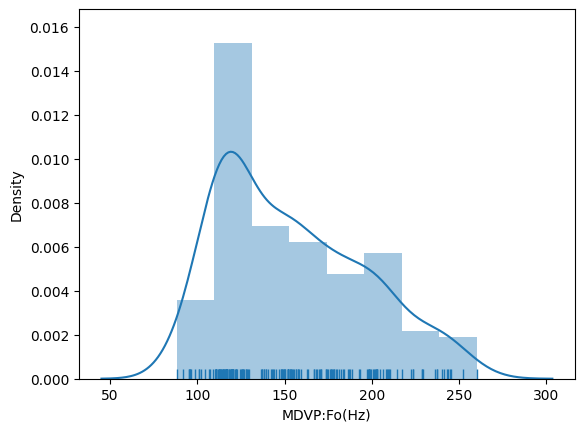

In [ ]:
# plotting of 'MDVP:Fo(Hz)':
sns.distplot(parkinson_data['MDVP:Fo(Hz)'], rug = True)

From the above plot it seems that the curve is slightly positively skewed.

In [ ]:
# measure of skewness of 'MDVP:Fo(Hz)':
parkinson_data['MDVP:Fo(Hz)'].skew()

0.5917374636540784

The curve being slightly positive skewed is being ascertained.

<Axes: xlabel='MDVP:Fo(Hz)'>

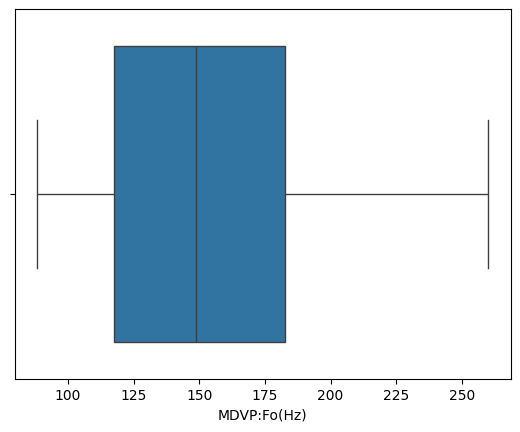

In [ ]:
# presence of outliers in 'MDVP:Fo(Hz)':
sns.boxplot(parkinson_data['MDVP:Fo(Hz)'], orient='h')

From the above plot it is clear that the attribute **'MDVP:Fo(Hz)'** doesn't have any outliers in them.

<Axes: xlabel='MDVP:Fhi(Hz)', ylabel='Density'>

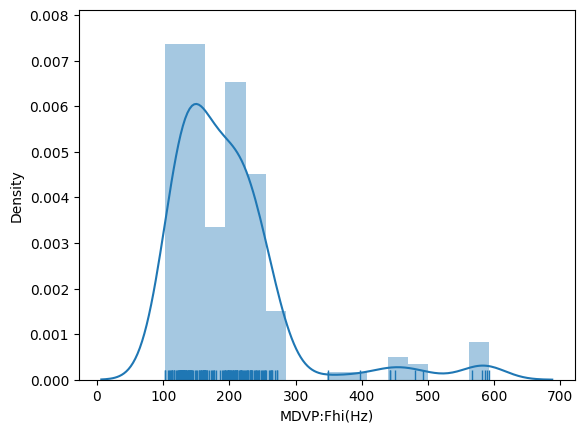

In [ ]:
# plotting of 'MDVP:Fhi(Hz)':
sns.distplot(parkinson_data['MDVP:Fhi(Hz)'], rug = True)

From the plot it is clear that the there are individuals having extreme values of maximum vocal fundamental frequency.

In [ ]:
# measure of skewness of 'Experience':
parkinson_data['MDVP:Fhi(Hz)'].skew()

2.542145997588398

The curve is highly positively skewed.

<Axes: ylabel='MDVP:Fhi(Hz)'>

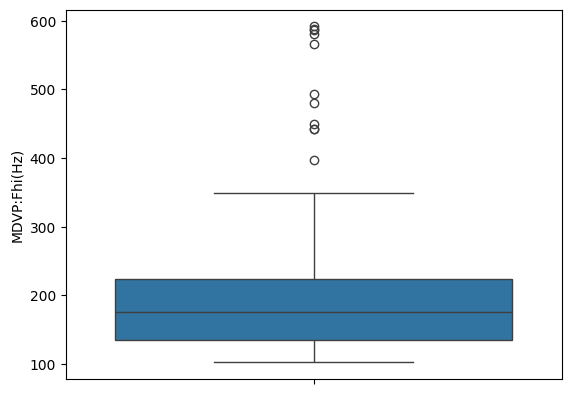

In [ ]:
# presence of outliers in 'MDVP:Fhi(Hz)':
sns.boxplot(parkinson_data['MDVP:Fhi(Hz)'])

From the above plot it is clear that **'MDVP:Fhi(Hz)'** does have outliers with them. The number of outliers can be calculated as follows:

In [ ]:
fhi_25 = np.percentile(parkinson_data['MDVP:Fhi(Hz)'], 25)
fhi_75 = np.percentile(parkinson_data['MDVP:Fhi(Hz)'], 75)
iqr_fhi = fhi_75 - fhi_25
cutoff_fhi = 1.5 * iqr_fhi
low_lim_fhi = fhi_25 - cutoff_fhi
upp_lim_fhi = fhi_75 + cutoff_fhi

outlier_fhi = [x for x in parkinson_data['MDVP:Fhi(Hz)'] if x < low_lim_fhi or x > upp_lim_fhi]
print("The number of outliers in 'MDVP:Fhi(Hz)' out off 195 records are:", len(outlier_fhi))

The number of outliers in 'MDVP:Fhi(Hz)' out off 195 records are: 11


Thus, there are 11 values in **'MDVP:Fhi(Hz)'** which are extreme as compared to other observations in the same attribute .

<Axes: xlabel='MDVP:Flo(Hz)', ylabel='Density'>

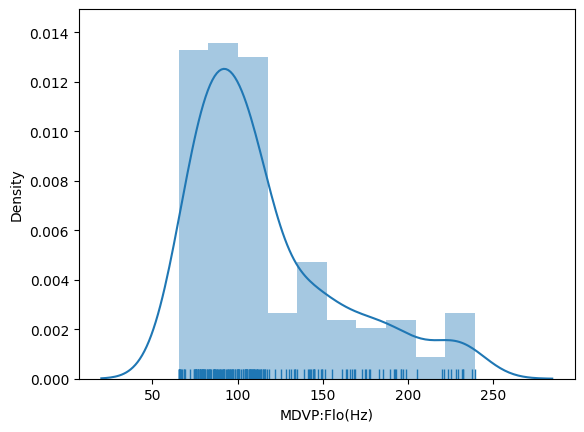

In [ ]:
# plotting of 'MDVP:Fdlo(Hz)':
sns.distplot(parkinson_data['MDVP:Flo(Hz)'], rug = True)

From the graph it is clear that the curve is skewed positively.

In [ ]:
# measure of skewness of 'MDVP:Flo(Hz)':
parkinson_data['MDVP:Flo(Hz)'].skew()

1.217350448627808

The curve being positively skewed is ascertained here.

<Axes: ylabel='MDVP:Flo(Hz)'>

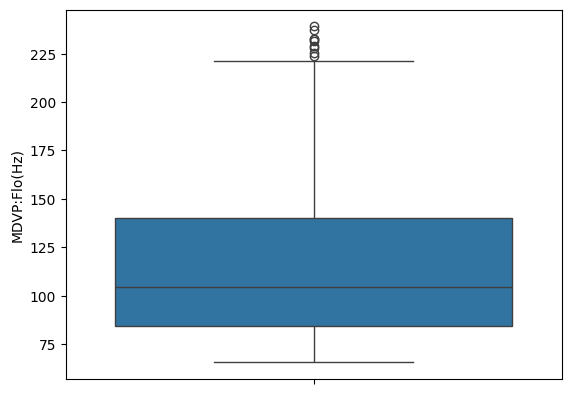

In [ ]:
# presence of outliers in 'MDVP:Flo(Hz)':
sns.boxplot(parkinson_data['MDVP:Flo(Hz)'])

As, seen from the above plot, there are some outliers in **'MDVP:Flo(Hz)'**. The number of outliers can be calculated as:

In [ ]:
flo_25 = np.percentile(parkinson_data['MDVP:Flo(Hz)'], 25)
flo_75 = np.percentile(parkinson_data['MDVP:Flo(Hz)'], 75)
iqr_flo = flo_75 - flo_25
cutoff_flo = 1.5 * iqr_flo
low_lim_flo = flo_25 - cutoff_flo
upp_lim_flo = flo_75 + cutoff_flo

outlier_flo = [x for x in parkinson_data['MDVP:Flo(Hz)'] if x < low_lim_flo or x > upp_lim_flo]
print("The number of outliers in 'MDVP:Flo(Hz)' out off 5000 records are:", len(outlier_flo))

The number of outliers in 'MDVP:Flo(Hz)' out off 5000 records are: 9


Thus, there are 9 values in **'MDVP:Flo(Hz)'** which are extreme as compared to other observations in the same attribute .

<Axes: xlabel='MDVP:Jitter(%)', ylabel='Density'>

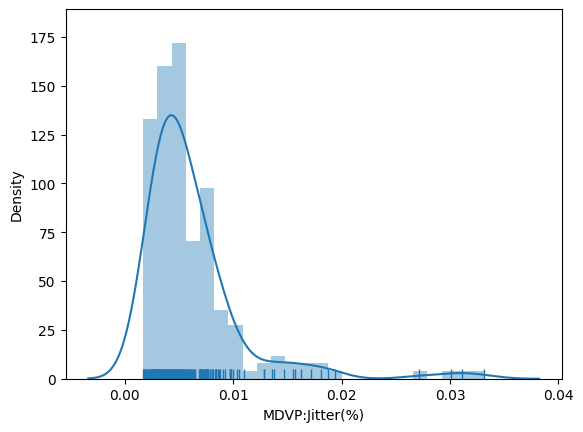

In [ ]:
# plotting of 'MDVP:Jitter(%)':
sns.distplot(parkinson_data['MDVP:Jitter(%)'], rug = True)

The curve is a highly skewed one, thereby suggesting the presence of outliers.

In [ ]:
# measure of skewness of 'MDVP:Jitter(%)':
parkinson_data['MDVP:Jitter(%)'].skew()

3.0849462014441826

The curve is highly positively skewed.

<Axes: ylabel='MDVP:Jitter(%)'>

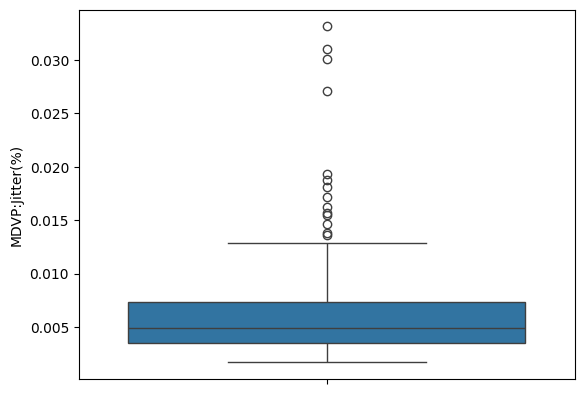

In [ ]:
# presence of outliers in 'MDVP:Jitter(%)':
sns.boxplot(parkinson_data['MDVP:Jitter(%)'])

As seen from the above plot, **'MDVP:Jitter(%)'** does have outliers. The number of outliers can be calculated as:

In [ ]:
jit_25 = np.percentile(parkinson_data['MDVP:Jitter(%)'], 25)
jit_75 = np.percentile(parkinson_data['MDVP:Jitter(%)'], 75)
iqr_jit = jit_75 - jit_25
cutoff_jit = 1.5 * iqr_jit
low_lim_jit = jit_25 - cutoff_jit
upp_lim_jit = jit_75 + cutoff_jit

outlier_jit = [x for x in parkinson_data['MDVP:Jitter(%)'] if x < low_lim_jit or x > upp_lim_jit]
print("The number of outliers in 'MDVP:Jitter(%)' out off 5000 records are:", len(outlier_jit))

The number of outliers in 'MDVP:Jitter(%)' out off 5000 records are: 14


Thus, there are 14 values in **'MDVP:Jitter(%)'** which are extreme as compared to other observations in the same attribute .

<Axes: xlabel='MDVP:Jitter(Abs)', ylabel='Density'>

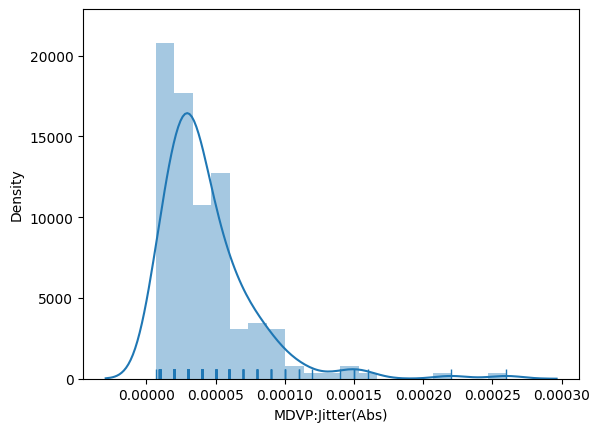

In [ ]:
# plotting of 'MDVP:Jitter(Abs)':
sns.distplot(parkinson_data['MDVP:Jitter(Abs)'], rug = True)

The curve is a highly skewed one, thereby suggesting the presence of outliers.

In [ ]:
# measure of skewness of 'MDVP:Jitter(Abs)':
parkinson_data['MDVP:Jitter(Abs)'].skew()

2.6490714165257274

The curve is highly positively skewed.

<Axes: ylabel='MDVP:Jitter(Abs)'>

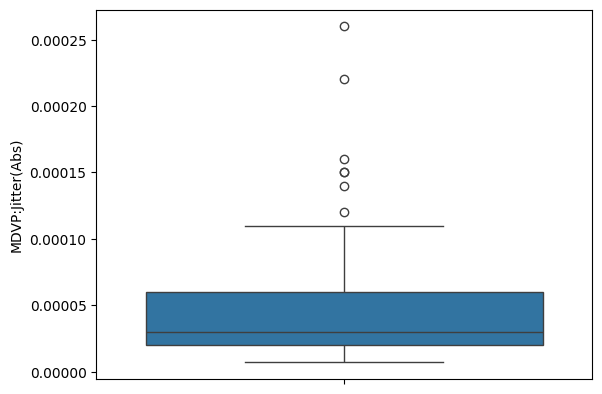

In [ ]:
# presence of outliers in 'MDVP:Jitter(Abs)':
sns.boxplot(parkinson_data['MDVP:Jitter(Abs)'])

From the above plot it is clear that outliers are present in **'MDVP:Jitter(Abs)'**. The number of outliers can be calculated as:

In [ ]:
jitab_25 = np.percentile(parkinson_data['MDVP:Jitter(Abs)'], 25)
jitab_75 = np.percentile(parkinson_data['MDVP:Jitter(Abs)'], 75)
iqr_jitab = jitab_75 - jitab_25
cutoff_jitab = 1.5 * iqr_jitab
low_lim_jitab = jitab_25 - cutoff_jitab
upp_lim_jitab = jitab_75 + cutoff_jitab

outlier_jitab = [x for x in parkinson_data['MDVP:Jitter(Abs)'] if x < low_lim_jitab or x > upp_lim_jitab]
print("The number of outliers in 'MDVP:Jitter(Abs)' out off 195 records are:", len(outlier_jitab))

The number of outliers in 'MDVP:Jitter(Abs)' out off 195 records are: 7


Thus, there are 6 values in **'MDVP:Jitter(Abs)'** which are extreme as compared to other observations in the same attribute .

<Axes: xlabel='MDVP:RAP', ylabel='Density'>

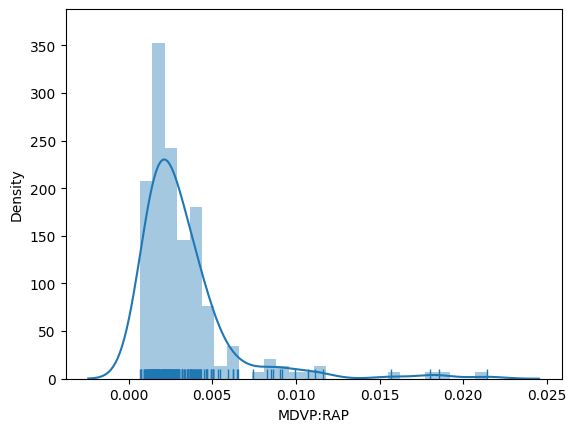

In [ ]:
# plotting of 'MDVP:RAP':
sns.distplot(parkinson_data['MDVP:RAP'], rug = True)

The curve is a highly skewed one, thereby suggesting the presence of outliers.

In [ ]:
# measure of skewness of 'MDVP:RAP':
parkinson_data['MDVP:RAP'].skew()

3.3607084504805544

The curve is highly positively skewed.

<Axes: ylabel='MDVP:RAP'>

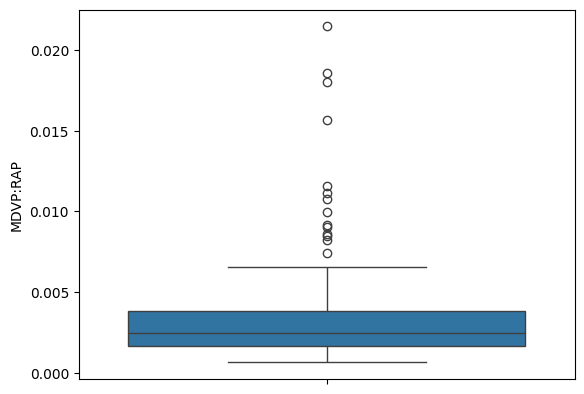

In [ ]:
# presence of outliers in 'MDVP:RAP':
sns.boxplot(parkinson_data['MDVP:RAP'])

From the above plot it is evident that **'MDVP:RAP'** does have outliers in them. The number of outliers can be calculated as:

In [ ]:
rap_25 = np.percentile(parkinson_data['MDVP:RAP'], 25)
rap_75 = np.percentile(parkinson_data['MDVP:RAP'], 75)
iqr_rap = rap_75 - rap_25
cutoff_rap = 1.5 * iqr_rap
low_lim_rap = rap_25 - cutoff_rap
upp_lim_rap = rap_75 + cutoff_rap

outlier_rap = [x for x in parkinson_data['MDVP:RAP'] if x < low_lim_rap or x > upp_lim_rap]
print("The number of outliers in 'MDVP:RAP' out off 195 records are:", len(outlier_rap))

The number of outliers in 'MDVP:RAP' out off 195 records are: 14


Thus, there are 14 values in **'MDVP:RAP'** which are extreme as compared to other observations in the same attribute .

<Axes: xlabel='MDVP:PPQ', ylabel='Density'>

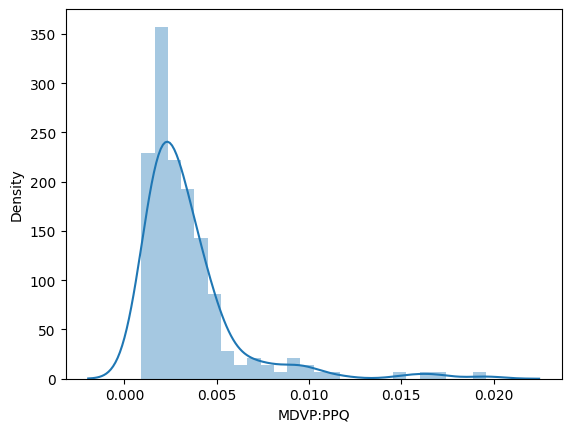

In [ ]:
# plotting of 'MDVP:PPQ':
sns.distplot(parkinson_data['MDVP:PPQ'])

The curve is a highly skewed one, thereby suggesting the presence of outliers.

In [ ]:
# measure of skewness in 'MDVP:PPQ':
parkinson_data['MDVP:PPQ'].skew()

3.0738924578885167

The curve is highly positively skewed.

<Axes: ylabel='MDVP:PPQ'>

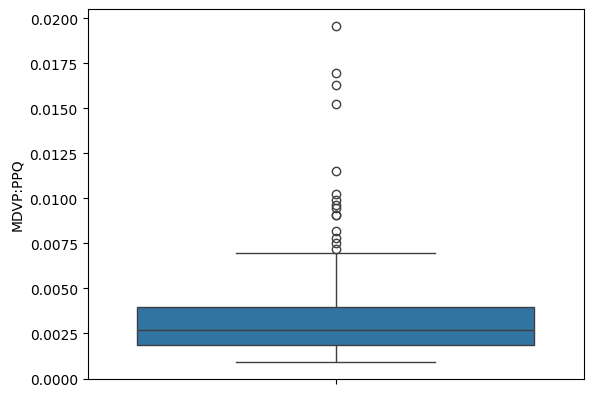

In [ ]:
# presence of outliers in 'MDVP:PPQ':
sns.boxplot(parkinson_data['MDVP:PPQ'])

From the above plot it is clear that **'MDVP:PPQ'** does have outliers in them. The number of outliers can be calculated as:

In [ ]:
ppq_25 = np.percentile(parkinson_data['MDVP:PPQ'], 25)
ppq_75 = np.percentile(parkinson_data['MDVP:PPQ'], 75)
iqr_ppq = ppq_75 - ppq_25
cutoff_ppq = 1.5 * iqr_ppq
low_lim_ppq = ppq_25 - cutoff_ppq
upp_lim_ppq = ppq_75 + cutoff_ppq

outlier_ppq = [x for x in parkinson_data['MDVP:PPQ'] if x < low_lim_ppq or x > upp_lim_ppq]
print("The number of outliers in 'MDVP:PPQ' out off 195 records are:", len(outlier_ppq))

The number of outliers in 'MDVP:PPQ' out off 195 records are: 15


Thus, the attribute **'MDVP:PPQ'** have 15 extreme values.

<Axes: xlabel='Jitter:DDP', ylabel='Density'>

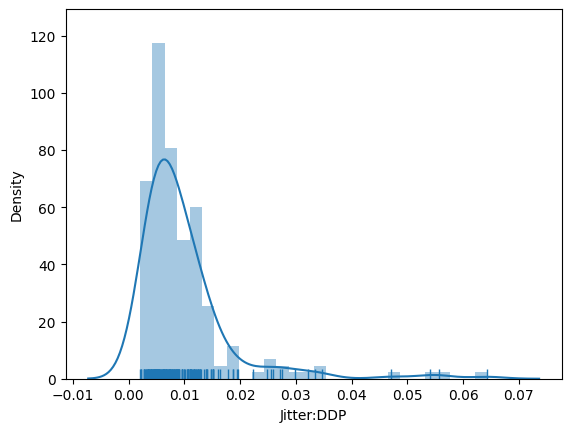

In [ ]:
# plotting of 'Jitter:DDP':
sns.distplot(parkinson_data['Jitter:DDP'], rug = True)

The curve is a highly skewed one, thereby suggesting the presence of outliers.

In [ ]:
# measure of skewness in 'Jitter:DDP':
parkinson_data['Jitter:DDP'].skew()

3.36205844788572

The curve is highly positively skewed.

<Axes: ylabel='Jitter:DDP'>

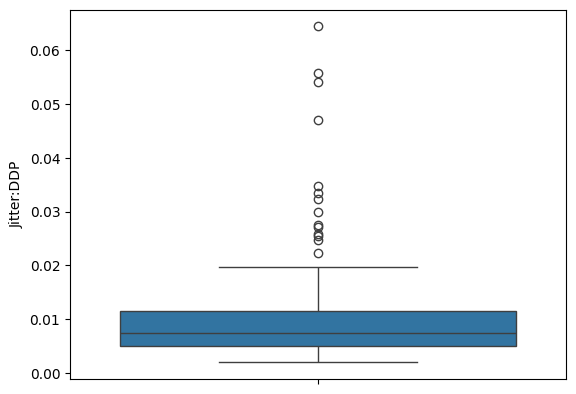

In [ ]:
# presence of outliers in 'Jitter:DDP':
sns.boxplot(parkinson_data['Jitter:DDP'])

From the above plot it is clear that **'Jitter:DDP'** have outliers. The number of outliers can be calculated as:

In [ ]:
ddp_25 = np.percentile(parkinson_data['Jitter:DDP'], 25)
ddp_75 = np.percentile(parkinson_data['Jitter:DDP'], 75)
iqr_ddp = ddp_75 - ddp_25
cutoff_ddp = 1.5 * iqr_ddp
low_lim_ddp = ddp_25 - cutoff_ddp
upp_lim_ddp = ddp_75 + cutoff_ddp

outlier_ddp = [x for x in parkinson_data['Jitter:DDP'] if x < low_lim_ddp or x > upp_lim_ddp]
print("The number of outliers in 'Jitter:DDP' out off 195 records are:", len(outlier_ddp))

The number of outliers in 'Jitter:DDP' out off 195 records are: 14


Thus, in **'Jitter:DDP'** there are 14 extreme values as compared to its other values.

<Axes: xlabel='MDVP:Shimmer', ylabel='Density'>

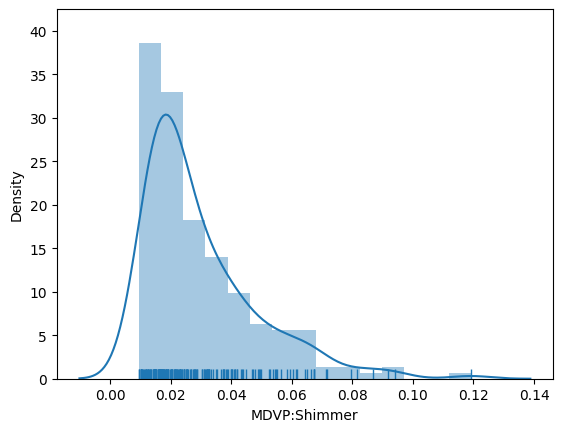

In [ ]:
# plotting of 'MDVP:Shimmer':
sns.distplot(parkinson_data['MDVP:Shimmer'], rug = True)

From the graph it is clear that it is positively skewed.

In [ ]:
# measure of skewness in 'MDVP:Shimmer':
parkinson_data['MDVP:Shimmer'].skew()

1.6664804101559665

The curve being positively skewed is being ascertained here.

<Axes: ylabel='MDVP:Shimmer'>

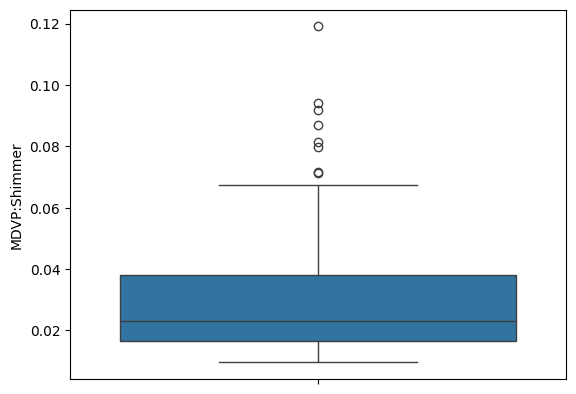

In [ ]:
# presence of outliers in 'MDVP:Shimmer':
sns.boxplot(parkinson_data['MDVP:Shimmer'])

From the above plot it is clear that the attribute **'MDVP:Shimmer'** have outliers. The number of outliers can be calculated as:

In [ ]:
shi_25 = np.percentile(parkinson_data['MDVP:Shimmer'], 25)
shi_75 = np.percentile(parkinson_data['MDVP:Shimmer'], 75)
iqr_shi = shi_75 - shi_25
cutoff_shi = 1.5 * iqr_shi
low_lim_shi = shi_25 - cutoff_shi
upp_lim_shi = shi_75 + cutoff_shi

outlier_shi = [x for x in parkinson_data['MDVP:Shimmer'] if x < low_lim_shi or x > upp_lim_shi]
print("The number of outliers in 'MDVP:Shimmer' out off 195 records are:", len(outlier_shi))

The number of outliers in 'MDVP:Shimmer' out off 195 records are: 8


Thus, there are 8 values in **'MDVP:Shimmer'** that are being calculated as extremes.

<Axes: xlabel='MDVP:Shimmer(dB)', ylabel='Density'>

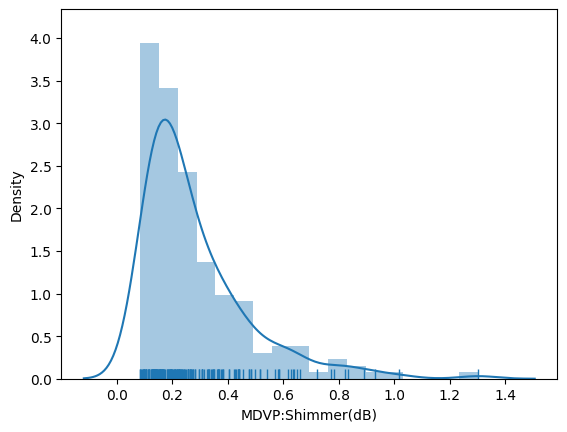

In [ ]:
# plotting of 'MDVP:Shimmer(dB)':
sns.distplot(parkinson_data['MDVP:Shimmer(dB)'], rug = True)

The curve is positively skewed.

In [ ]:
# measure of skewness in 'MDVP:Shimmer(dB)':
parkinson_data['MDVP:Shimmer(dB)'].skew()

1.999388639086127

The curve being positively skewed is ascertained here.

<Axes: ylabel='MDVP:Shimmer(dB)'>

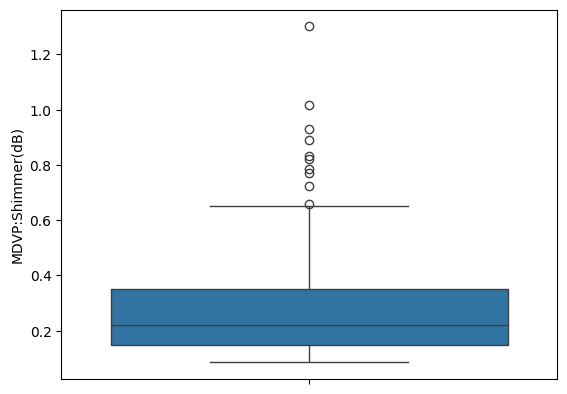

In [ ]:
# presence of outlier in 'MDVP:Shimmer(dB)':
sns.boxplot(parkinson_data['MDVP:Shimmer(dB)'])

**'MDVP:Shimmer(dB)'** have outliers in them. The number of outliers can be calculated as:

In [ ]:
shidB_25 = np.percentile(parkinson_data['MDVP:Shimmer(dB)'], 25)
shidB_75 = np.percentile(parkinson_data['MDVP:Shimmer(dB)'], 75)
iqr_shidB = shidB_75 - shidB_25
cutoff_shidB = 1.5 * iqr_shidB
low_lim_shidB = shidB_25 - cutoff_shidB
upp_lim_shidB = shidB_75 + cutoff_shidB

outlier_shidB = [x for x in parkinson_data['MDVP:Shimmer(dB)'] if x < low_lim_shidB or x > upp_lim_shidB]
print("The number of outliers in 'MDVP:Shimmer(dB)' out off 195 records are:", len(outlier_shidB))

The number of outliers in 'MDVP:Shimmer(dB)' out off 195 records are: 10


Thus, 10 values in **'MDVP:Shimmer(dB)'** have extreme values in them.

<Axes: xlabel='Shimmer:APQ3', ylabel='Density'>

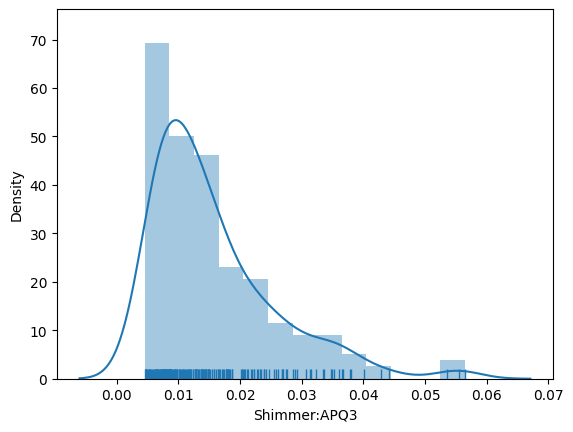

In [ ]:
# plotting of 'Shimmer:APQ3':
sns.distplot(parkinson_data['Shimmer:APQ3'], rug = True)

From the above plot it is clear that the attribute does have outliers in them.

In [ ]:
# measure of skewness in 'Shimmer:APQ3':
parkinson_data['Shimmer:APQ3'].skew()

1.5805763798815669

The curve is positively skewed.

<Axes: ylabel='Shimmer:APQ3'>

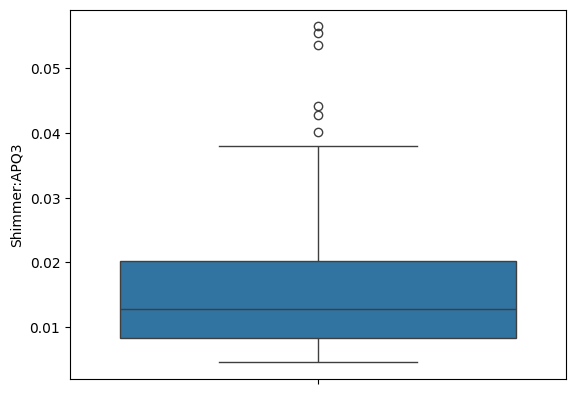

In [ ]:
# presence of outliers in 'Shimmer:APQ3':
sns.boxplot(parkinson_data['Shimmer:APQ3'])

The number of outliers in **'Shimmer:APQ3'** can be calculated as:

In [ ]:
apq3_25 = np.percentile(parkinson_data['Shimmer:APQ3'], 25)
apq3_75 = np.percentile(parkinson_data['Shimmer:APQ3'], 75)
iqr_apq3 = apq3_75 - apq3_25
cutoff_apq3 = 1.5 * iqr_apq3
low_lim_apq3 = apq3_25 - cutoff_apq3
upp_lim_apq3 = apq3_75 + cutoff_apq3

outlier_apq3 = [x for x in parkinson_data['Shimmer:APQ3'] if x < low_lim_apq3 or x > upp_lim_apq3]
print("The number of outliers in 'Shimmer:APQ3' out off 195 records are:", len(outlier_apq3))

The number of outliers in 'Shimmer:APQ3' out off 195 records are: 6


Thus, there are 6 values in **'Shimmer:APQ3'** which are considered as outliers.

<Axes: xlabel='Shimmer:APQ5', ylabel='Density'>

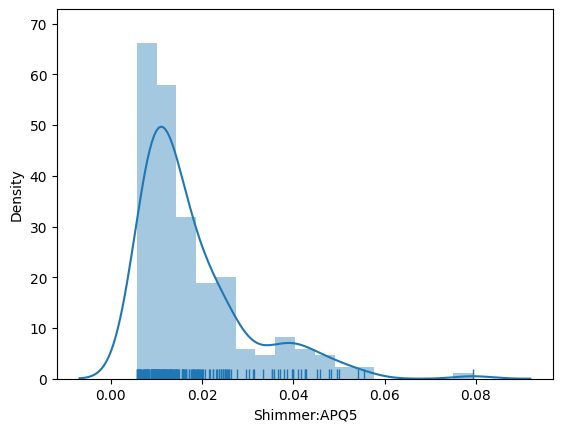

In [ ]:
# plotting of 'Shimmer:APQ5':
sns.distplot(parkinson_data['Shimmer:APQ5'], rug = True)

The curve is positively skewed with presence of outliers in them.

In [ ]:
# measure of skewness in 'Shimmer:APQ5':
parkinson_data['Shimmer:APQ5'].skew()

1.7986970665376225

The curve is positively skewed here.

<Axes: ylabel='Shimmer:APQ5'>

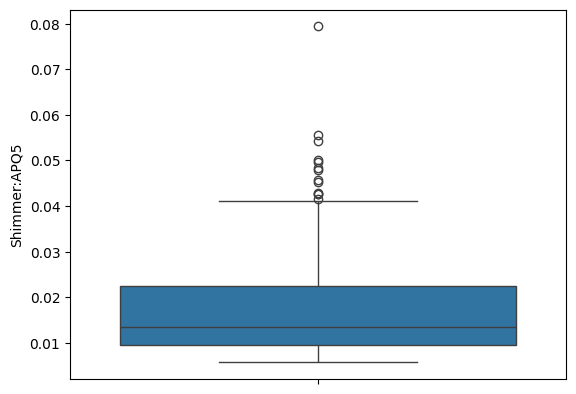

In [ ]:
# presence of outliers in 'Shimmer:APQ5':
sns.boxplot(parkinson_data['Shimmer:APQ5'])

The number of outliers in **'Shimmer:APQ5'** is calculated as:

In [ ]:
apq5_25 = np.percentile(parkinson_data['Shimmer:APQ5'], 25)
apq5_75 = np.percentile(parkinson_data['Shimmer:APQ5'], 75)
iqr_apq5 = apq5_75 - apq5_25
cutoff_apq5 = 1.5 * iqr_apq5
low_lim_apq5 = apq5_25 - cutoff_apq5
upp_lim_apq5 = apq5_75 + cutoff_apq5

outlier_apq5 = [x for x in parkinson_data['Shimmer:APQ5'] if x < low_lim_apq5 or x > upp_lim_apq5]
print("The number of outliers in 'Shimmer:APQ5' out off 195 records are:", len(outlier_apq5))

The number of outliers in 'Shimmer:APQ5' out off 195 records are: 13


Thus, there are 13 extreme values in **'Shimmer:APQ5'**.

<Axes: xlabel='MDVP:APQ', ylabel='Density'>

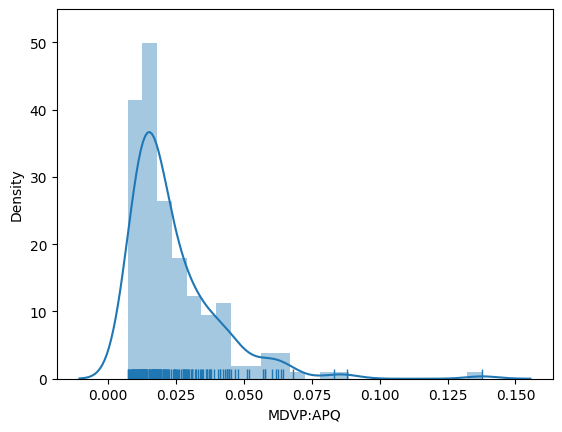

In [ ]:
# plotting of 'MDVP:APQ':
sns.distplot(parkinson_data['MDVP:APQ'], rug = True)

The curve is highly positively skewed with presence of outliers in them.

In [ ]:
# measure of skewness in 'MDVP:APQ':
parkinson_data['MDVP:APQ'].skew()

2.6180465022154227

The curve is highly positively skewed.

<Axes: ylabel='MDVP:APQ'>

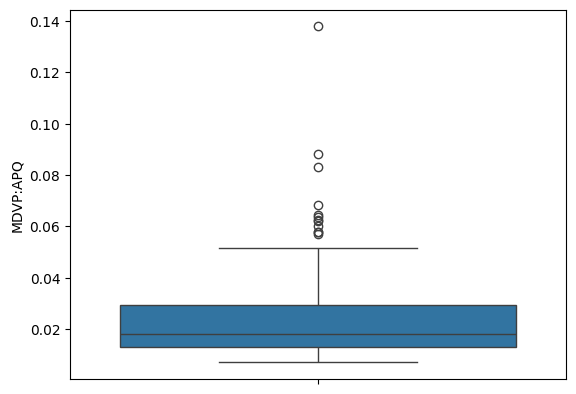

In [ ]:
# presence of outliers in 'MDVP:APQ':
sns.boxplot(parkinson_data['MDVP:APQ'])

From the above plot it is clear that there are outliers in **'MDVP:APQ'** whose strength can be calculated as:

In [ ]:
apq_25 = np.percentile(parkinson_data['MDVP:APQ'], 25)
apq_75 = np.percentile(parkinson_data['MDVP:APQ'], 75)
iqr_apq = apq_75 - apq_25
cutoff_apq = 1.5 * iqr_apq
low_lim_apq = apq_25 - cutoff_apq
upp_lim_apq = apq_75 + cutoff_apq

outlier_apq = [x for x in parkinson_data['MDVP:APQ'] if x < low_lim_apq or x > upp_lim_apq]
print("The number of outliers in 'MDVP:APQ' out off 195 records are:", len(outlier_apq))

The number of outliers in 'MDVP:APQ' out off 195 records are: 12


Thus, 12 values in **'MDVP:APQ'** are considered extremes.

<Axes: xlabel='Shimmer:DDA', ylabel='Density'>

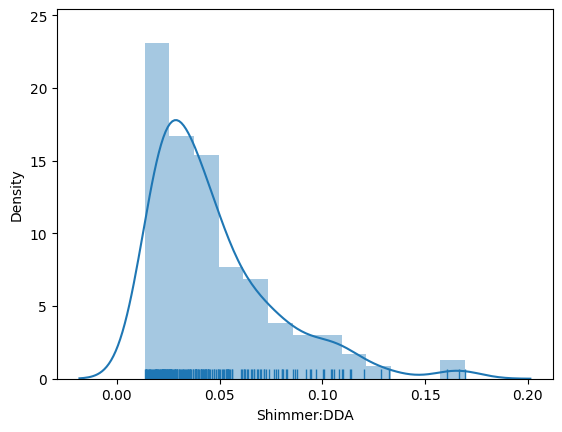

In [ ]:
# plotting of 'Shimmer:DDA':
sns.distplot(parkinson_data['Shimmer:DDA'], rug = True)

The curve is positively skewed.

In [ ]:
# measure of skewness in 'Shimmer:DDA':
parkinson_data['Shimmer:DDA'].skew()

1.5806179936782254

The curve being positively skewed is ascertained here.

<Axes: ylabel='Shimmer:DDA'>

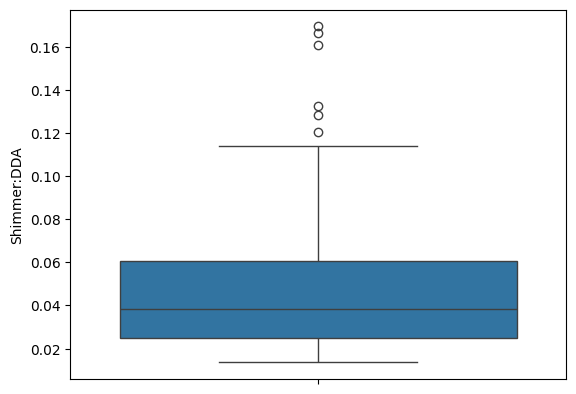

In [ ]:
# presence of outliers in 'Shimmer:DDA':
sns.boxplot(parkinson_data['Shimmer:DDA'])

The number of outliers in **'Shimmet:DDA'** can be calculated as:

In [ ]:
dda_25 = np.percentile(parkinson_data['Shimmer:DDA'], 25)
dda_75 = np.percentile(parkinson_data['Shimmer:DDA'], 75)
iqr_dda = dda_75 - dda_25
cutoff_dda = 1.5 * iqr_dda
low_lim_dda = dda_25 - cutoff_dda
upp_lim_dda = dda_75 + cutoff_dda

outlier_dda = [x for x in parkinson_data['Shimmer:DDA'] if x < low_lim_dda or x > upp_lim_dda]
print("The number of outliers in 'Shimmer:DDA' out off 195 records are:", len(outlier_dda))

The number of outliers in 'Shimmer:DDA' out off 195 records are: 6


Thus, there are 6 extreme values in **'Shimmer:DDA'**.

<Axes: xlabel='NHR', ylabel='Density'>

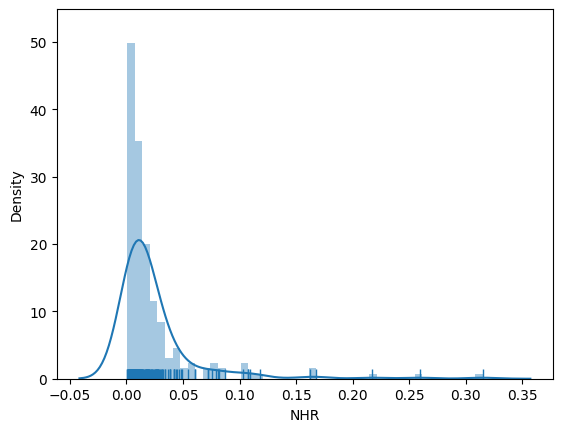

In [ ]:
# plotting of 'NHR':
sns.distplot(parkinson_data['NHR'], rug = True)

The curve is highly positively skewed with presence of outliers.

In [ ]:
# measure of skewness in 'NHR':
parkinson_data['NHR'].skew()

4.2207091291390615

The curve is highly positively skewed,

<Axes: ylabel='NHR'>

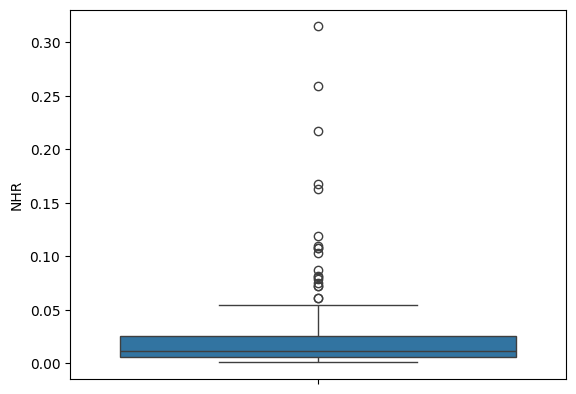

In [ ]:
# presence of outliers in 'NHR':
sns.boxplot(parkinson_data['NHR'])

The number of outliers in **'NHR'** can be calculated as:

In [ ]:
nhr_25 = np.percentile(parkinson_data['NHR'], 25)
nhr_75 = np.percentile(parkinson_data['NHR'], 75)
iqr_nhr = nhr_75 - nhr_25
cutoff_nhr = 1.5 * iqr_nhr
low_lim_nhr = nhr_25 - cutoff_nhr
upp_lim_nhr = nhr_75 + cutoff_nhr

outlier_nhr = [x for x in parkinson_data['NHR'] if x < low_lim_nhr or x > upp_lim_nhr]
print("The number of outliers in 'NHR' out off 195 records are:", len(outlier_nhr))

The number of outliers in 'NHR' out off 195 records are: 19


Thus, there are 19 values in **'NHR'** that are considered outliers.

<Axes: xlabel='HNR', ylabel='Density'>

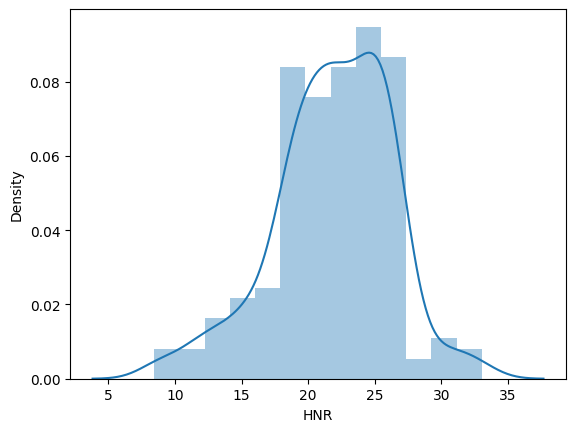

In [ ]:
# plotting of 'HNR':
sns.distplot(parkinson_data['HNR'])

The curve is slighty negatively skewed.

In [ ]:
# measure of skewness in 'HNR':
parkinson_data['HNR'].skew()

-0.5143174975652068

The curve beingg negatively skewed is ascertained here.

<Axes: ylabel='HNR'>

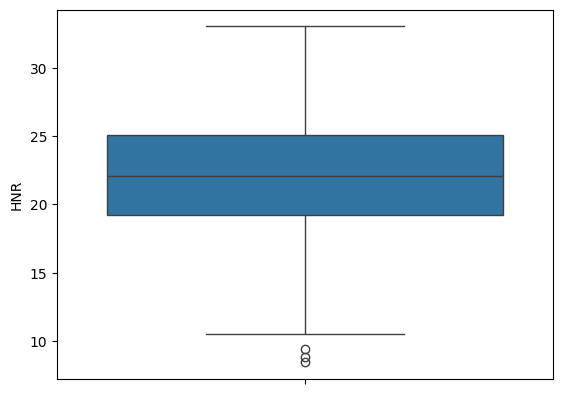

In [ ]:
# prsence of outlier in 'HNR':
sns.boxplot(parkinson_data['HNR'])

From the above plot it is clear that **'HNR'** does have outliers in them. The number of outliers can be calculated as:

In [ ]:
hnr_25 = np.percentile(parkinson_data['HNR'], 25)
hnr_75 = np.percentile(parkinson_data['HNR'], 75)
iqr_hnr = hnr_75 - hnr_25
cutoff_hnr = 1.5 * iqr_hnr
low_lim_hnr = hnr_25 - cutoff_hnr
upp_lim_hnr = hnr_75 + cutoff_hnr

outlier_hnr = [x for x in parkinson_data['HNR'] if x < low_lim_hnr or x > upp_lim_hnr]
print("The number of outliers in 'HNR' out off 195 records are:", len(outlier_hnr))

The number of outliers in 'HNR' out off 195 records are: 3


Thus, there are only 3 extreme values in **'HNR'**.

<Axes: xlabel='RPDE', ylabel='Density'>

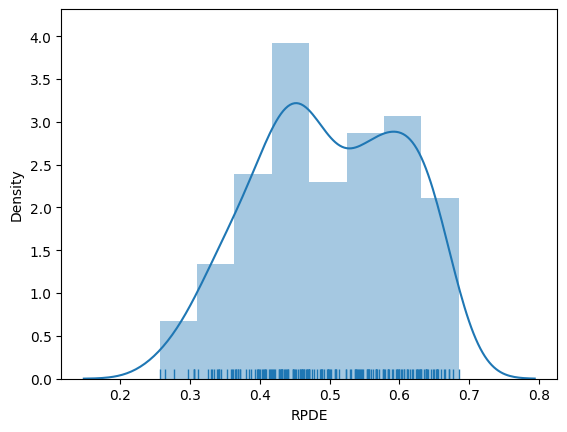

In [ ]:
# plotting of 'RPDE':
sns.distplot(parkinson_data['RPDE'], rug = True)

From the plot it seems that the attribute is almost normally distributed.

In [ ]:
# measure of skewness in 'RPDE':
parkinson_data['RPDE'].skew()

-0.14340241379821705

The curve is slightly negatively skewed.

<Axes: ylabel='RPDE'>

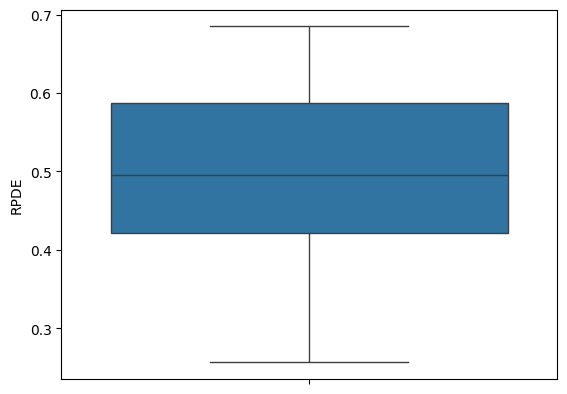

In [ ]:
# presence of outliers in 'RPDE':
sns.boxplot(parkinson_data['RPDE'])

There are no outliers in **'RPDE'**.

<Axes: xlabel='DFA', ylabel='Density'>

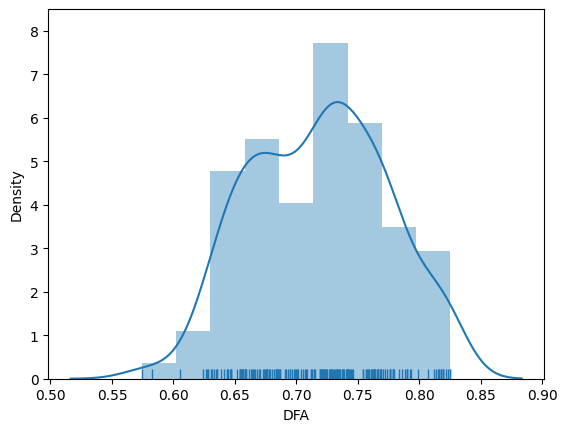

In [ ]:
# plotting of 'DFA':
sns.distplot(parkinson_data['DFA'], rug = True)

The attribute is almost normally distributed.

In [ ]:
# measure of skewness in 'DFA':
parkinson_data['DFA'].skew()

-0.03321366071383457

The curve is slightly negatively skewed.

<Axes: ylabel='DFA'>

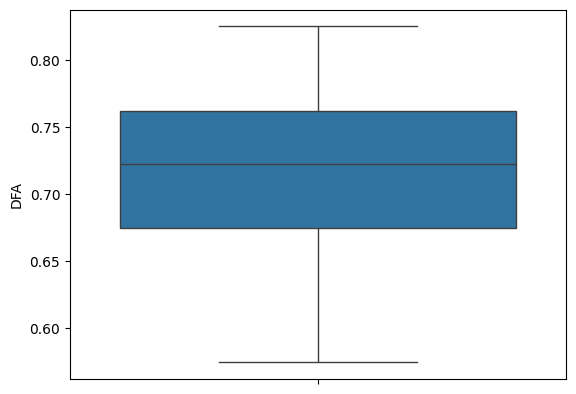

In [ ]:
# presence of outliers in 'DFA':
sns.boxplot(parkinson_data['DFA'])

From the plot it is clear that **'DFA'** doesn't have any outliers in them.

<Axes: xlabel='spread1', ylabel='Density'>

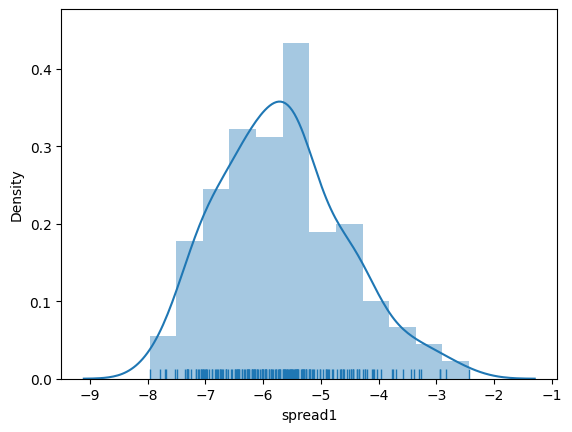

In [ ]:
# plotting of 'spread1':
sns.distplot(parkinson_data['spread1'], rug = True)

From the above plot it seems that the attribute is almost normally distributed.

In [ ]:
# measure of skewness in 'spread1':
parkinson_data['spread1'].skew()

0.4321389320131794

The curve is slightly positively skewed.

<Axes: ylabel='spread1'>

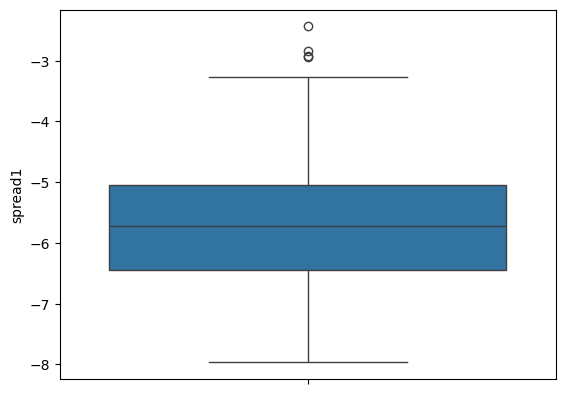

In [ ]:
# prsence of outliers in 'spread1':
sns.boxplot(parkinson_data['spread1'])

From the above plot it is clear that the attribute **'spread1'** does have outliers in them. The number of outliers can be calculated as:

In [ ]:
sp1_25 = np.percentile(parkinson_data['spread1'], 25)
sp1_75 = np.percentile(parkinson_data['spread1'], 75)
iqr_sp1 = sp1_75 - sp1_25
cutoff_sp1 = 1.5 * iqr_sp1
low_lim_sp1 = sp1_25 - cutoff_sp1
upp_lim_sp1 = sp1_75 + cutoff_sp1

outlier_sp1 = [x for x in parkinson_data['spread1'] if x < low_lim_sp1 or x > upp_lim_sp1]
print("The number of outliers in 'spread1' out off 195 records are:", len(outlier_sp1))

The number of outliers in 'spread1' out off 195 records are: 4


Thus, there are only 4 extreme values in **'spread1'**.

<Axes: xlabel='spread2', ylabel='Density'>

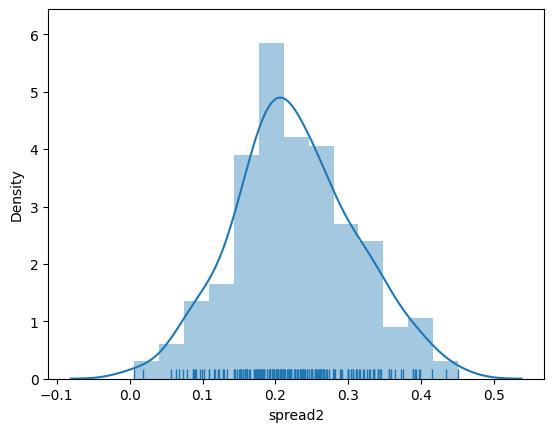

In [ ]:
# plotting of 'spread2':
sns.distplot(parkinson_data['spread2'], rug = True)

The attribute is almost normally distributed.

In [ ]:
# measure of skewness in 'spread2':
parkinson_data['spread2'].skew()

0.1444304854927841

The curve is slightly positively skewed.

<Axes: ylabel='spread2'>

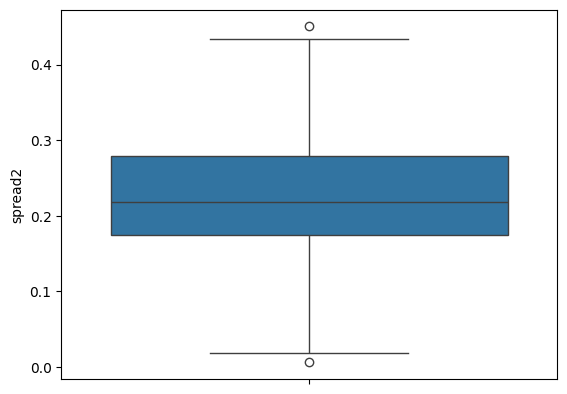

In [ ]:
# presence of outliers in 'spread2':
sns.boxplot(parkinson_data['spread2'])

From the plot it is clear that **'spread2'** have outliers in them. The number of outliers can be calculated as:

In [ ]:
sp2_25 = np.percentile(parkinson_data['spread2'], 25)
sp2_75 = np.percentile(parkinson_data['spread2'], 75)
iqr_sp2 = sp2_75 - sp2_25
cutoff_sp2 = 1.5 * iqr_sp2
low_lim_sp2 = sp2_25 - cutoff_sp2
upp_lim_sp2 = sp2_75 + cutoff_sp2

outlier_sp2 = [x for x in parkinson_data['spread2'] if x < low_lim_sp2 or x > upp_lim_sp2]
print("The number of outliers in 'spread2' out off 195 records are:", len(outlier_sp2))

The number of outliers in 'spread2' out off 195 records are: 2


Thus, in **'spread2'** only 2 values are extreme as compared to its other values.

<Axes: xlabel='D2', ylabel='Density'>

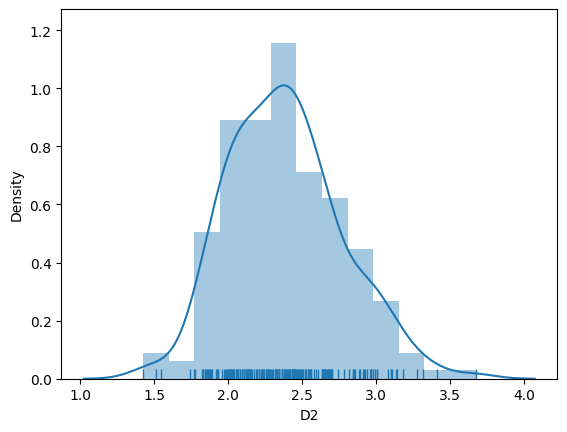

In [ ]:
# plotting of 'D2':
sns.distplot(parkinson_data['D2'], rug = True)

The attribute is almost normally distributed.

In [ ]:
# measure of skewness in 'D2':
parkinson_data['D2'].skew()

0.4303838913329285

The curve is slightly positively skewed.

<Axes: ylabel='D2'>

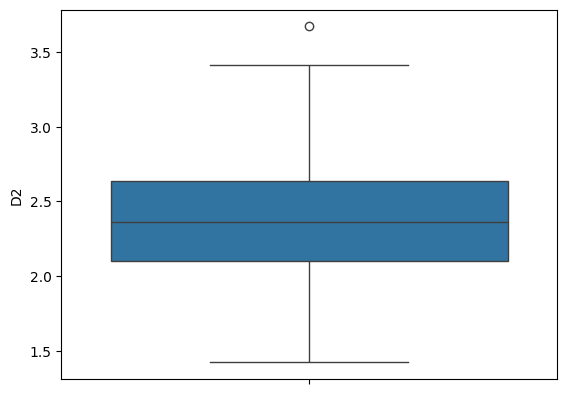

In [ ]:
# presence of outliers in 'D2':
sns.boxplot(parkinson_data['D2'])

From the above plot it is clear that **'D2'** have outliers. The number of outliers can be calculated as:  

In [ ]:
d2_25 = np.percentile(parkinson_data['D2'], 25)
d2_75 = np.percentile(parkinson_data['D2'], 75)
iqr_d2 = d2_75 - d2_25
cutoff_d2 = 1.5 * iqr_d2
low_lim_d2 = d2_25 - cutoff_d2
upp_lim_d2 = d2_75 + cutoff_d2

outlier_d2 = [x for x in parkinson_data['D2'] if x < low_lim_d2 or x > upp_lim_d2]
print("The number of outliers in 'D2' out off 195 records are:", len(outlier_d2))

The number of outliers in 'D2' out off 195 records are: 1


Thus, there is only one outlier in **'D2'**.

<Axes: xlabel='PPE', ylabel='Density'>

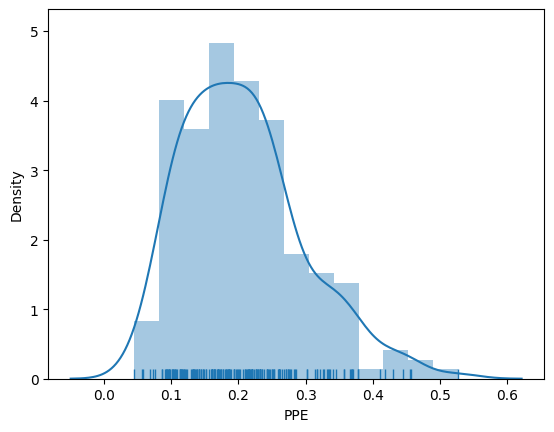

In [ ]:
# plotting of 'PPE':
sns.distplot(parkinson_data['PPE'], rug = True)

The curve is slightly positively skewed.

In [ ]:
# measure of skewness in 'PPE':
parkinson_data['PPE'].skew()

0.7974910716463577

The curve being positively skewed is ascertained here.

<Axes: ylabel='PPE'>

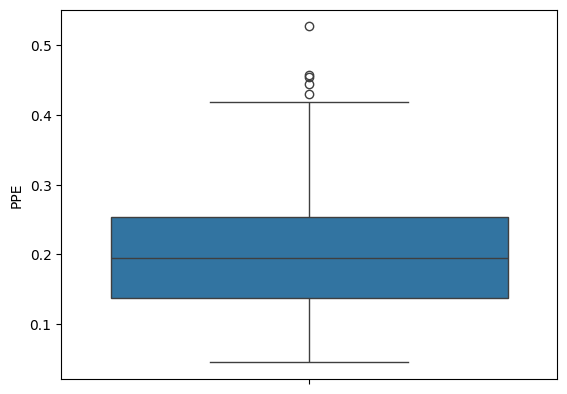

In [ ]:
# presence of outliers in 'PPE':
sns.boxplot(parkinson_data['PPE'])

From the above plot it is clear that the **'PPE'** have outliers in them. The number of outliers can be calculated as:

In [ ]:
ppe_25 = np.percentile(parkinson_data['PPE'], 25)
ppe_75 = np.percentile(parkinson_data['PPE'], 75)
iqr_ppe = ppe_75 - ppe_25
cutoff_ppe = 1.5 * iqr_ppe
low_lim_ppe = ppe_25 - cutoff_ppe
upp_lim_ppe = ppe_75 + cutoff_ppe

outlier_ppe = [x for x in parkinson_data['PPE'] if x < low_lim_ppe or x > upp_lim_ppe]
print("The number of outliers in 'PPE' out off 195 records are:", len(outlier_ppe))

The number of outliers in 'PPE' out off 195 records are: 5


Thus, there are only 5 extreme values in **'PPE'**.

<Axes: xlabel='name', ylabel='count'>

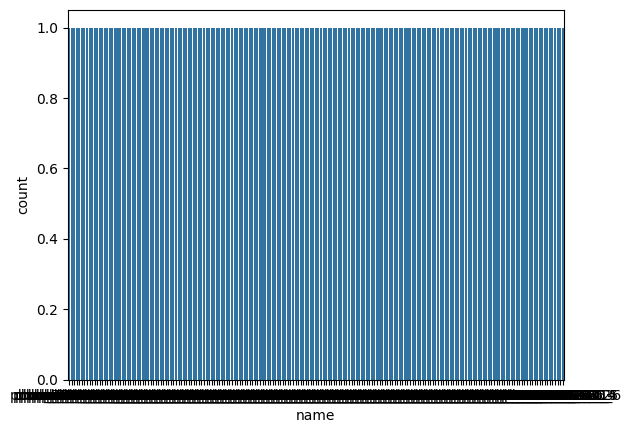

In [ ]:
# plotting of 'status':
sns.countplot(parkinson_data['status'])

In [ ]:
print('The number of Persons having Parkinson is = ', parkinson_data[parkinson_data['status'] == 1]['status'].count())
print('The number of Persons not having Parkinson is = ', parkinson_data[parkinson_data['status'] == 0]['status'].count())

The number of Persons having Parkinson is =  147
The number of Persons not having Parkinson is =  48


**'status'** is here the target or the dependent variable. From the above plot it is clear that the number of persons having Parkinson disease is much higher than those not having the disease. The ratio is almost 1:3. So we can assume that the model will have a much better chance to predict status = 1 than predicting status = 0.

#### Bivariate Analysis

Here we will be visualize as to how the different independent attributes vary with respect to the dependent attribute - **'status'**.

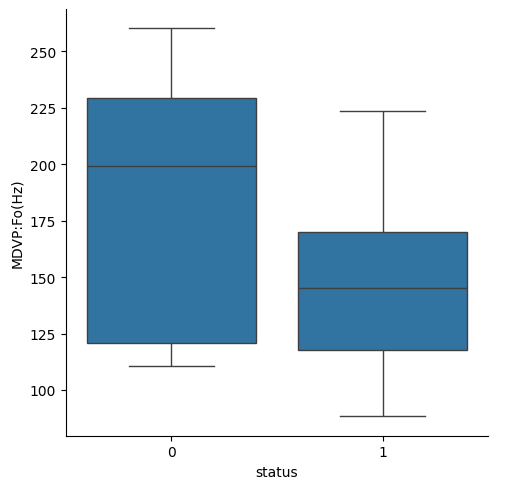

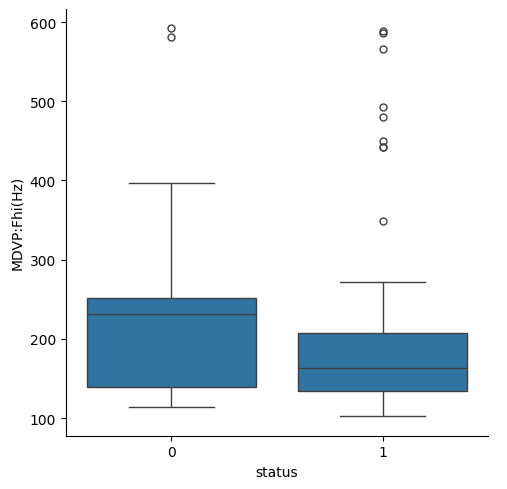

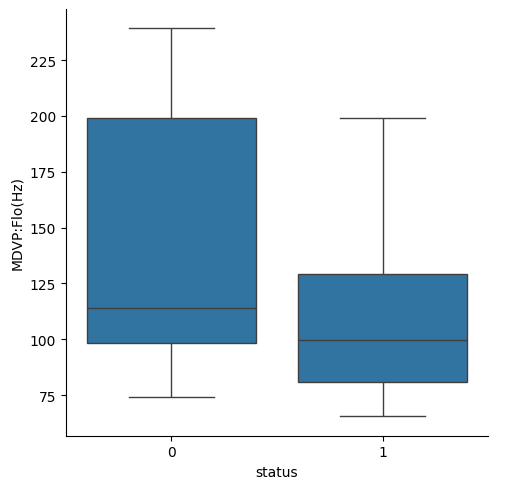

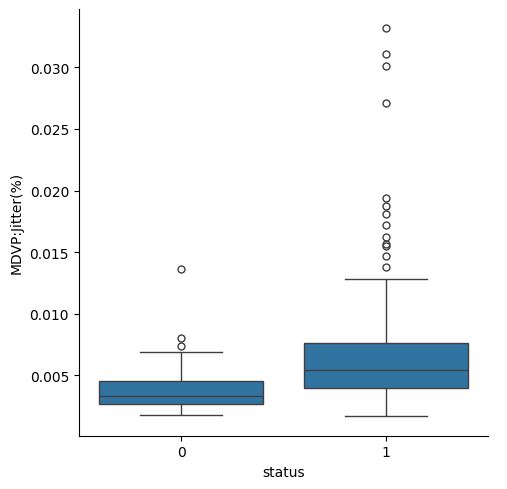

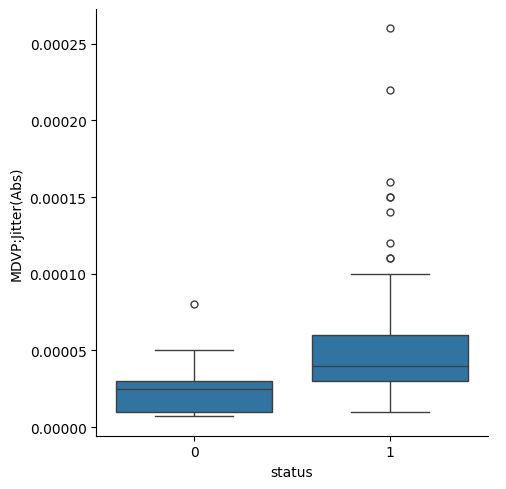

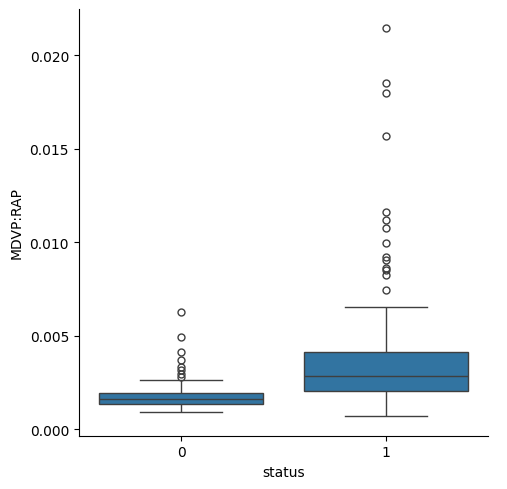

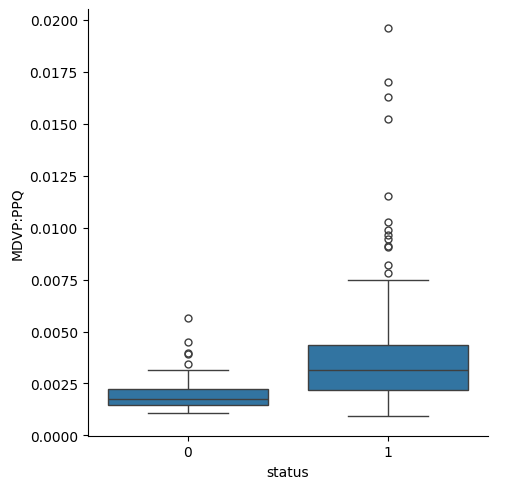

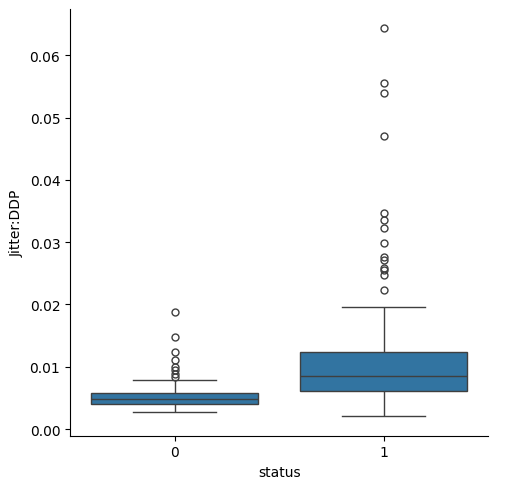

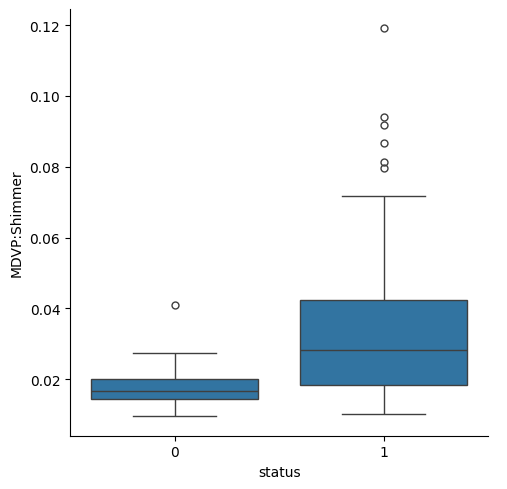

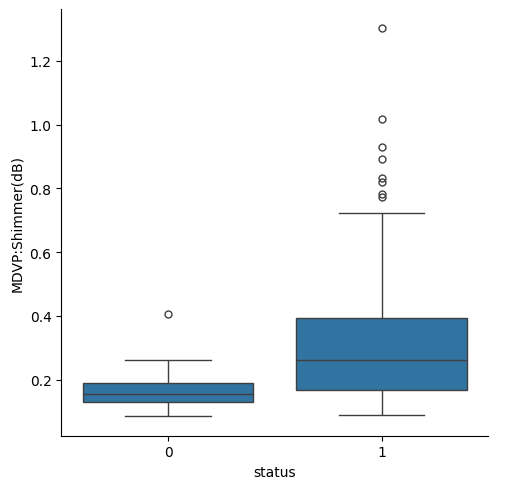

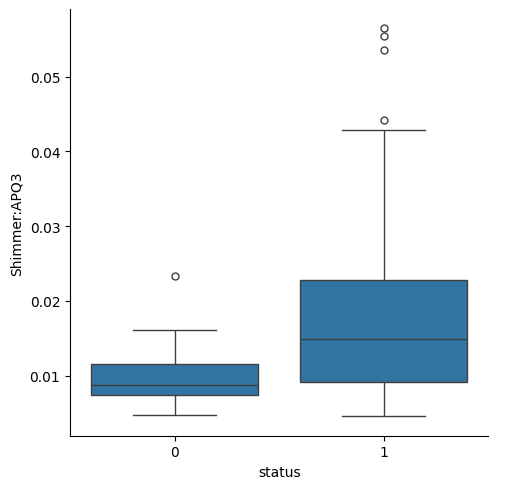

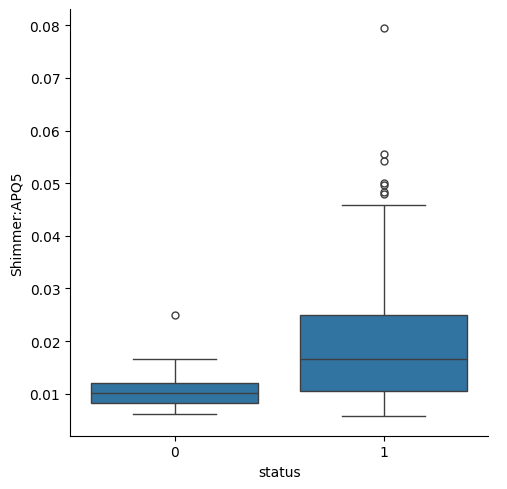

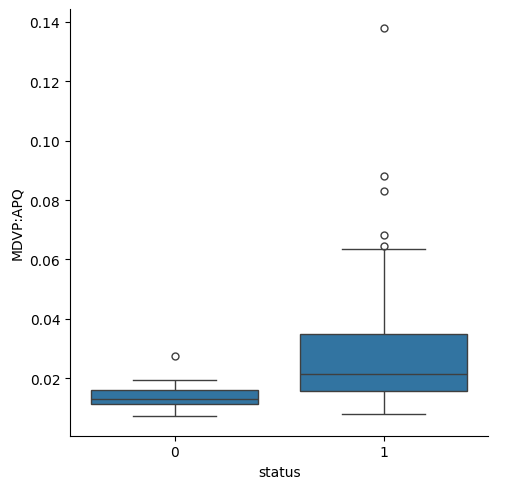

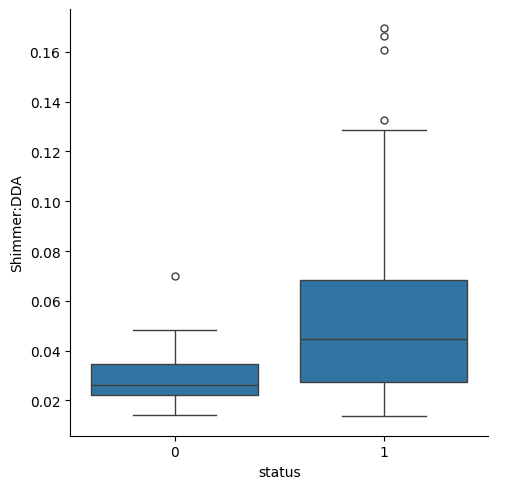

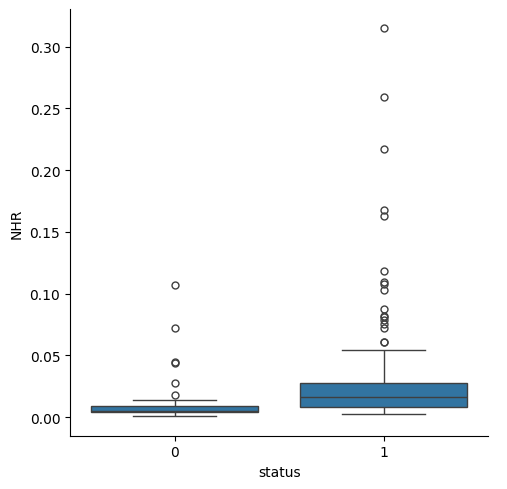

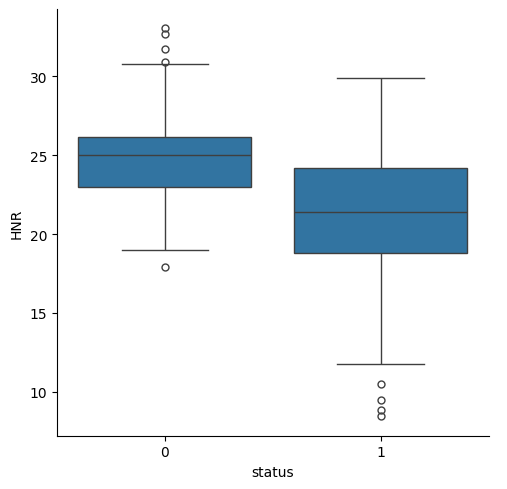

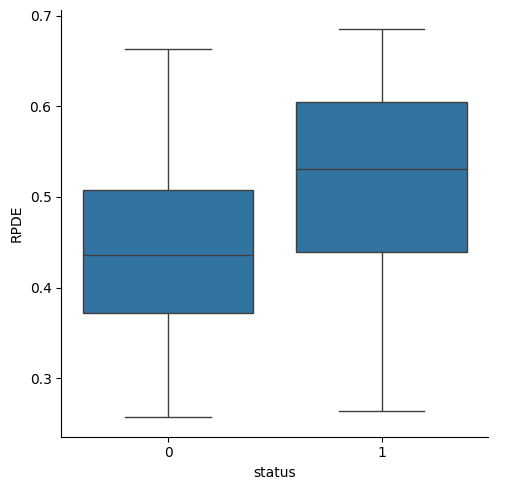

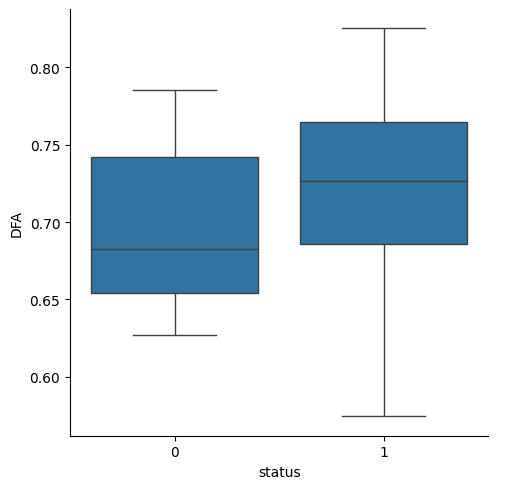

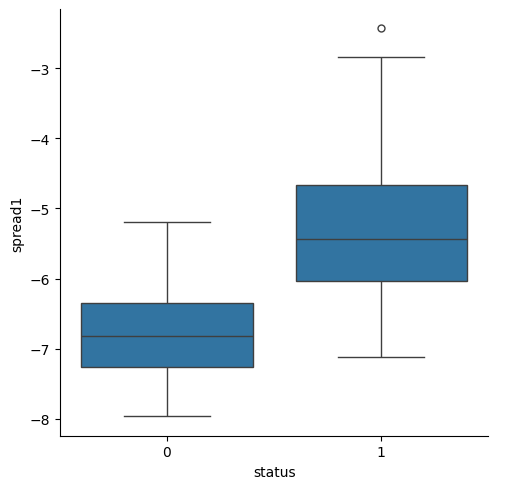

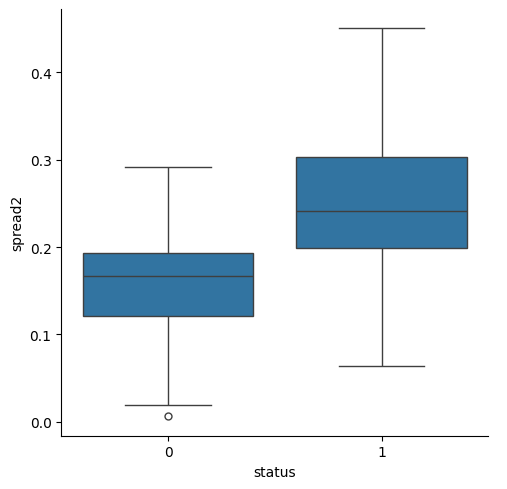

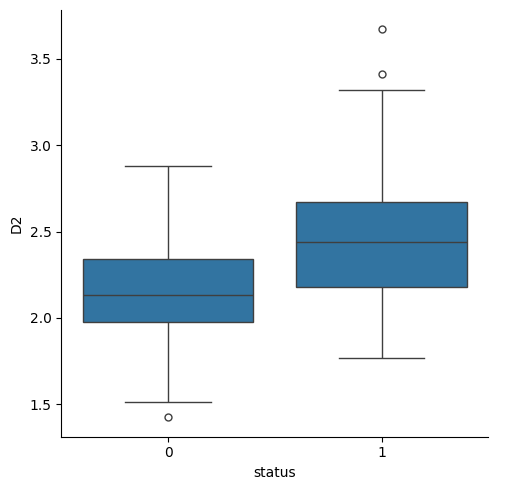

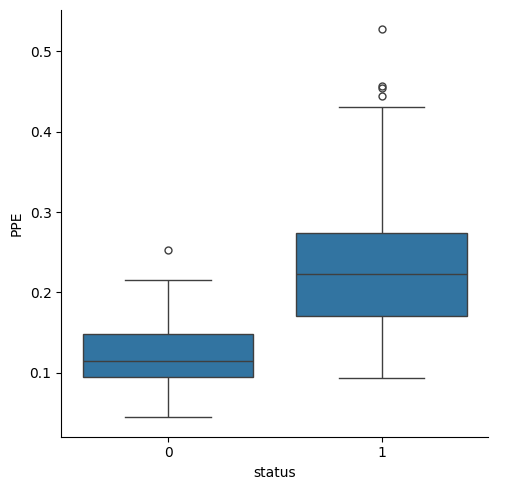

In [ ]:
for i in parkinson_data:
    if i != 'status':
        sns.catplot(x = 'status', y = i, kind = 'box', data = parkinson_data)

- From the boxplot it is clear that if the person has lower value of **'MDVP:Fo(Hz)'**, **'MDVP:Fhi(Hz)'**, **'MDVP:Flo(Hz)'**, **'HNR'**, then then person is affected by Parkinson.

- From the boxplot it is clear that if the person has higher value of **'MDVP:Jitter(%)'**, **'MDVP:Jitter(Abs)'**, **'MDVP:RAP'**, **'MDVP:PPQ'**, **'Jitter:DDP'**, **'MDVP:Shimmer'**, **'MDVP:Shimmer(dB)'**, **'Shimmer:APQ3'**, **'Shimmer:APQ5'**, **'MDVP:APQ'**, **'Shimmer:DDA'**, **'NHR'**, **'RPDE'**, **'DFA'**, **'spread1'**, **'spread2'**, **'D2'** and **'PPE'** then then person is affected by Parkinson.

#### Multivariate Analysis

This plot along with correlation matrix and heatmap will help us to analyze the relationship between the different attributes.

In [ ]:
sns.pairplot(parkinson_data, hue = 'status')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# calculating the correlation coefficient
corr = parkinson_data.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


(23.5, -0.5)

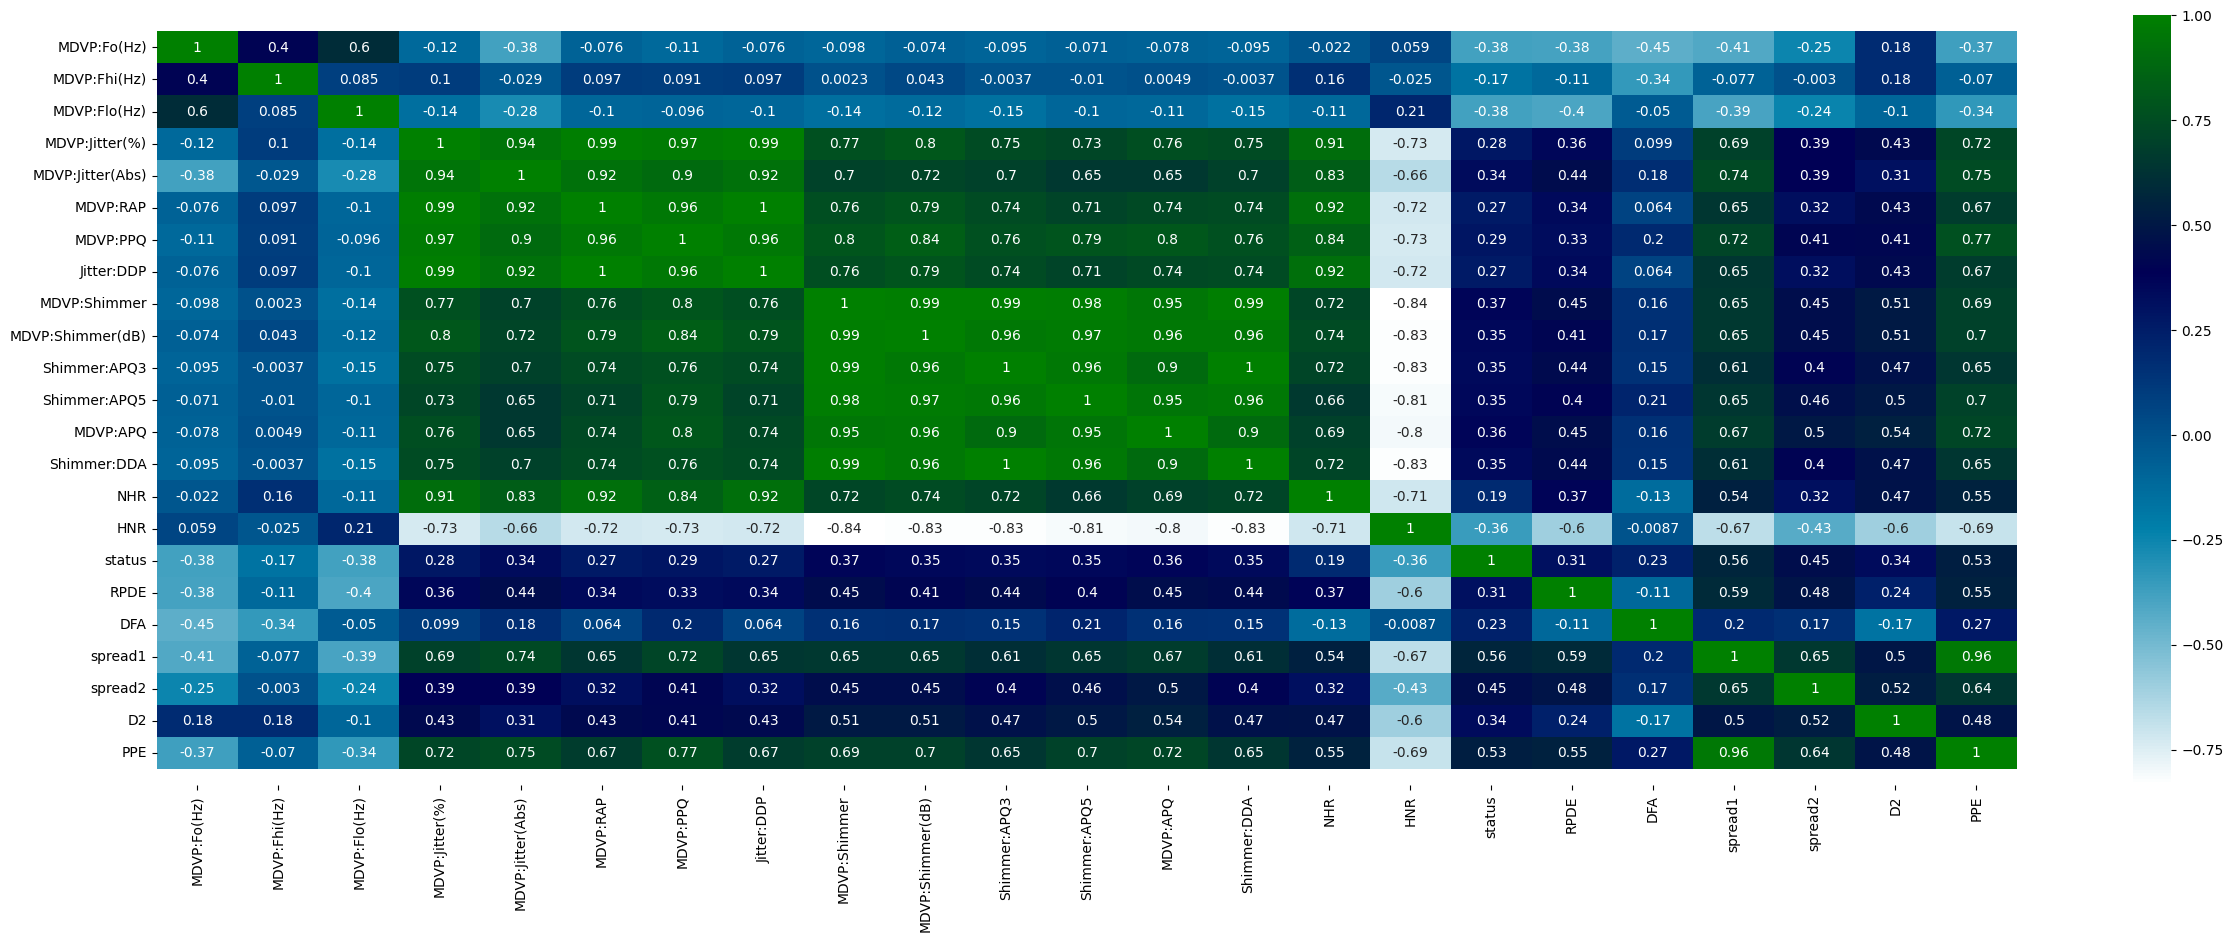

In [ ]:
# plotting a heatmap
plt.figure(figsize = (30,10))
ax = sns.heatmap(corr, annot = True, cmap = "ocean_r")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Thus, from the above three we can see that **MDVP:Jitter(%)** and **MDVP:RAP**, **MDVP:Jitter(%)** and **Jitter(DDP)**, **MDVP:Shimmer** and **MDVP:Shimmer(dB)**, **MDVP:Shimmer** and **Shimmer:APQ3** and **MDVP:Shimmer** and **Shimmer:DDA** all have a correlation value of 0.99.

### 4. Preparation of data for models and Splitting them into test and training dataset

As **MDVP:Jitter(%)** has a correlation of 0.99 with **MDVP:RAP** and **Jitter(DDP)** and similarly, **MDVP:Shimmer** has a correlation of 0.99 with **MDVP:Shimmer(dB)**, **Shimmer:APQ3** and **Shimmer:DDA**, so, we can drop off attributes: **MDVP:Jitter(%)** and **MDVP:Shimmer**.

In [ ]:
# dropping 'MDVP:Jitter(%)' and 'MDVP:Shimmer' from the dataframe:
parkinson_data.drop(['MDVP:Jitter(%)', 'MDVP:Shimmer'], axis = 1, inplace = True)
parkinson_data.head().T

name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992000,122.400000,116.682000,116.676000,116.014000
MDVP:Fhi(Hz),157.302000,148.650000,131.111000,137.871000,141.781000
MDVP:Flo(Hz),74.997000,113.819000,111.555000,111.366000,110.655000
MDVP:Jitter(Abs),0.000070,0.000080,0.000090,0.000090,0.000110
MDVP:RAP,0.003700,0.004650,0.005440,0.005020,0.006550
MDVP:PPQ,0.005540,0.006960,0.007810,0.006980,0.009080
Jitter:DDP,0.011090,0.013940,0.016330,0.015050,0.019660
MDVP:Shimmer(dB),0.426000,0.626000,0.482000,0.517000,0.584000
Shimmer:APQ3,0.021820,0.031340,0.027570,0.029240,0.034900
Shimmer:APQ5,0.031300,0.045180,0.038580,0.040050,0.048250


#### Splitting of Data into Training and Test Set in the ratio of 70:30 respectively

In [ ]:
X = parkinson_data.drop('status', axis = 1)
y = parkinson_data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Here, the independent variables are denoted by **'X'** and the predictor is represented by **'y'**.

We will also standardize the dataset:

In [ ]:
# standardization of the training and test data set
scaled_X_train = preprocessing.StandardScaler().fit_transform(X_train)
scaled_X_test = preprocessing.StandardScaler().fit_transform(X_test)

### 5. Train at least 3 standard classification algorithms and note down their accuracies on the test data.

#### Logistic Regression

In [ ]:
LogReg_model = LogisticRegression(random_state = 1)
LogReg_model.fit(scaled_X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
pred_log = LogReg_model.predict(scaled_X_test)
predictprob_log = LogReg_model.predict_proba(scaled_X_test)

pred_log
type(scaled_X_test)

numpy.ndarray

In [ ]:
# print classification report and accuracy score:
print('Classification report for the model after scaling is given as:', '\n', classification_report(y_test, pred_log))
print('Accuracy obtained from the given model after scaling is:', accuracy_score(y_test, pred_log))

Classification report for the model after scaling is given as: 
               precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.81      0.97      0.89        40

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59

Accuracy obtained from the given model after scaling is: 0.8305084745762712


The accuracy obtained with the standardized data set is 86.44%.

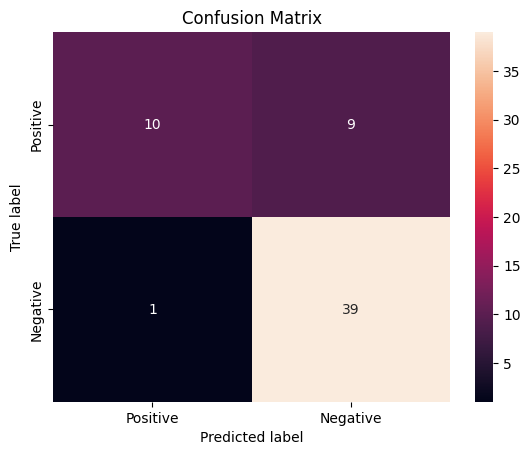

In [ ]:
# Confusion Matrix:
cm_log = confusion_matrix(y_test, pred_log)

class_label = ['Positive', 'Negative']
df_cm_log = pd.DataFrame(cm_log, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_log, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

[[10  9]
 [ 1 39]]


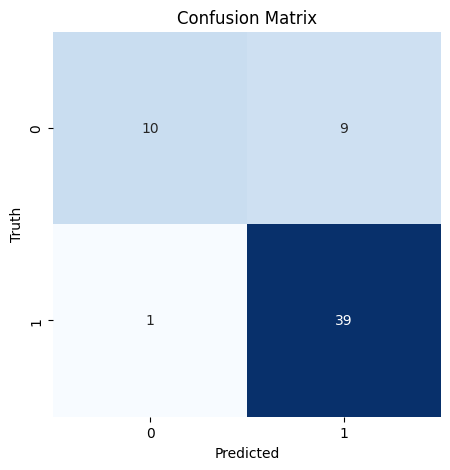

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, pred_log)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

Thus, the LogisticRegression Classifier has predicted 11 records as positive which were actually positive but 8 positive values as negative. Also, the model didn't predicted any actual negative values as positive. The model was able to successfully predict 40 negative records.

#### K-NN

In [ ]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

The optimal number of neighbors is 1


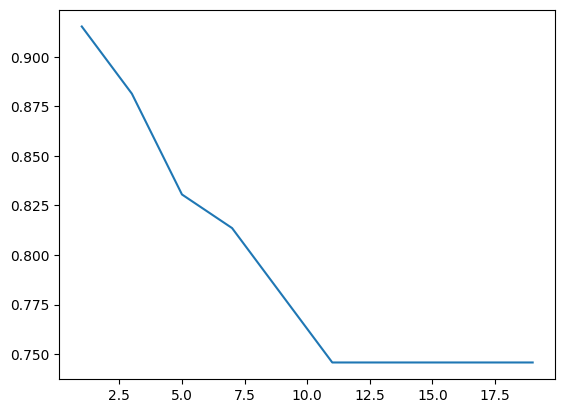

In [ ]:
# Empty list to hold accuracy scores
ac_scores_knn = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(scaled_X_train, y_train)

    y_pred = knn.predict(scaled_X_test)

    scores = accuracy_score(y_test, y_pred)
    ac_scores_knn.append(scores)

MSE = [1 - x for x in ac_scores_knn]

optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % optimal_k)

plt.plot(neighbors, ac_scores_knn)

So, here we will consider the value of k = 1.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', metric = 'euclidean')
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [ ]:
pred_knn = knn_model.predict(scaled_X_test)
predictprob_knn = knn_model.predict_proba(scaled_X_test)

In [ ]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_knn))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_knn))

Classification report for the model is given as: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.93      0.95      0.94        40

    accuracy                           0.92        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.92      0.91        59

Accuracy obtained from the given model is: 0.9152542372881356


Thus, the accuracy obtained from the model based on KNN is 91.52%.

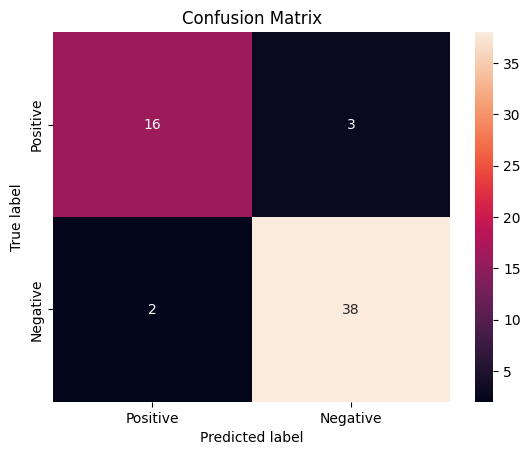

In [ ]:
# Confusion Matrix:
cm_knn = confusion_matrix(y_test, pred_knn)

class_label = ['Positive', 'Negative']
df_cm_knn = pd.DataFrame(cm_knn, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_knn, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From the above Classification Matrix it is clear that the model has predicted 16 records as Positive which were actually positive and 3 records as False Positive. Also, the model had correctly identified 38 records as Negative. However, the model had predicted 2 records as Negative which were actually Positive.  

#### Naive Bayes

In [ ]:
naive_model = GaussianNB()
naive_model.fit(scaled_X_train, y_train)

GaussianNB()

In [ ]:
pred_nb = naive_model.predict(scaled_X_test)
predictprob_nb = naive_model.predict_proba(scaled_X_test)

In [ ]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_nb))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_nb))

Classification report for the model is given as: 
               precision    recall  f1-score   support

           0       0.50      0.68      0.58        19
           1       0.82      0.68      0.74        40

    accuracy                           0.68        59
   macro avg       0.66      0.68      0.66        59
weighted avg       0.72      0.68      0.69        59

Accuracy obtained from the given model is: 0.6779661016949152


Thus, the accuracy obtained from the model based on Naive-Bayes classifier is 67.8%.

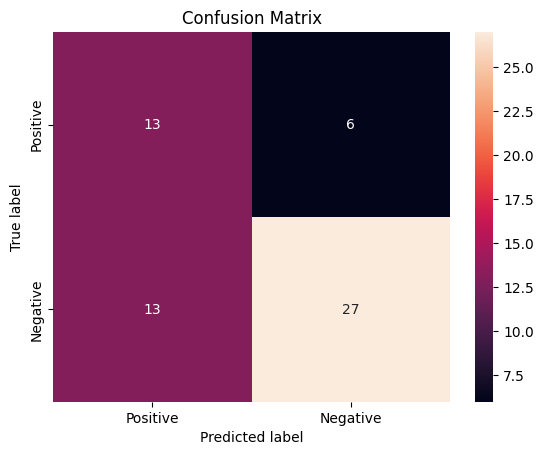

In [ ]:
# Confusion Matrix:
cm_nb = confusion_matrix(y_test, pred_nb)

class_label = ['Positive', 'Negative']
df_cm_nb = pd.DataFrame(cm_nb, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_nb, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From the above Classification Matrix it is clear that the model has predicted 13 records as Positive which were actually positive and 6 records as False Positive. Also, the model had correctly identified 27 records as Negative. However, the model had also predicted 13 records as False Negative.  

#### Support Vector Machine (SVM)

The best classifier is:  SVC(C=10.0, class_weight='balanced', gamma=0.1)


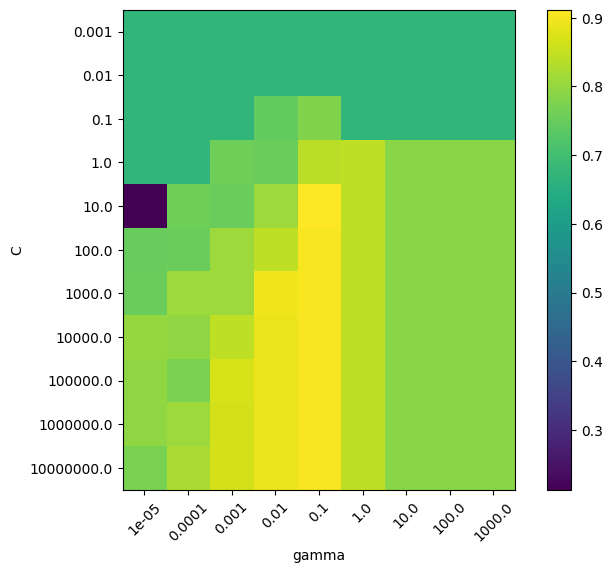

In [ ]:
C_range = 10. ** np.arange(-3,8)
gamma_range = 10. **np.arange(-5,4)

param_grid = dict(gamma = gamma_range, C = C_range)

grid = GridSearchCV(SVC(class_weight = 'balanced'), param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

grid.fit(scaled_X_train, y_train)
print("The best classifier is: ", grid.best_estimator_)

score_dict = grid.cv_results_

scores = score_dict.get('mean_test_score')
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.show()

In [ ]:
svm_model = SVC(C = 10.0, gamma = 0.1, class_weight = 'balanced', probability = True, random_state = 1)
svm_model.fit(scaled_X_train, y_train)

SVC(C=10.0, class_weight='balanced', gamma=0.1, probability=True,
    random_state=1)

In [ ]:
pred_svm = svm_model.predict(scaled_X_test)
predictprob_svm = svm_model.predict_proba(scaled_X_test)

In [ ]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_svm))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_svm))

Classification report for the model is given as: 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.91      1.00      0.95        40

    accuracy                           0.93        59
   macro avg       0.95      0.89      0.92        59
weighted avg       0.94      0.93      0.93        59

Accuracy obtained from the given model is: 0.9322033898305084


Thus, the accuracy obtained from the model based on SVM is 93.22%.

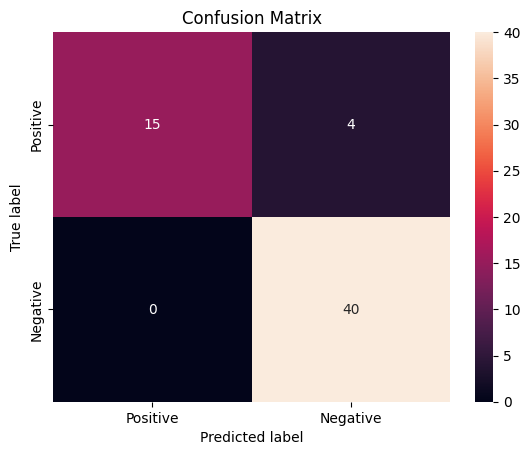

In [ ]:
# Confusion Matrix:
cm_svm = confusion_matrix(y_test, pred_svm)

class_label = ['Positive', 'Negative']
df_cm_svm = pd.DataFrame(cm_svm, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_svm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From the above Classification Matrix it is clear that the model has predicted 15 records as Positive which were actually positive and 4 records as False Positive. Also, the model had correctly identified 40 records as Negative and it didn't predicted any records as positive which were actually negative.  

### 6.Train a Meta Classifier and note the accuracy on test data.

Here a KNeighborsClassifier, Support Vector Classifier (SVC) and a Naive Bayes Classifier (GaussianNB) will be individually trained. The performance of each classifier will be measured using accuracy score. Finally, we will stack the predictions of these classifiers using the StackingCVClassifier object by using Logistic Regression classifier as the meta classifier and compare the results.

In [ ]:
knn_stack = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', metric = 'euclidean')
svm_stack = SVC(C = 10.0, gamma = 0.1, class_weight = 'balanced', probability = True, random_state = 1)
naive_stack = GaussianNB()
logreg_stack = LogisticRegression(random_state = 1)

sclf = StackingClassifier(classifiers = [knn_stack, svm_stack, naive_stack], meta_classifier = logreg_stack)

In [ ]:
classifiers = {'KNN': knn_stack, 'SVM': svm_stack, 'Naive Bayes': naive_stack, 'Stack': sclf}

for key in classifiers:
    classifier = classifiers[key]
    classifier.fit(scaled_X_train, y_train)

In [ ]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(scaled_X_test)

    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

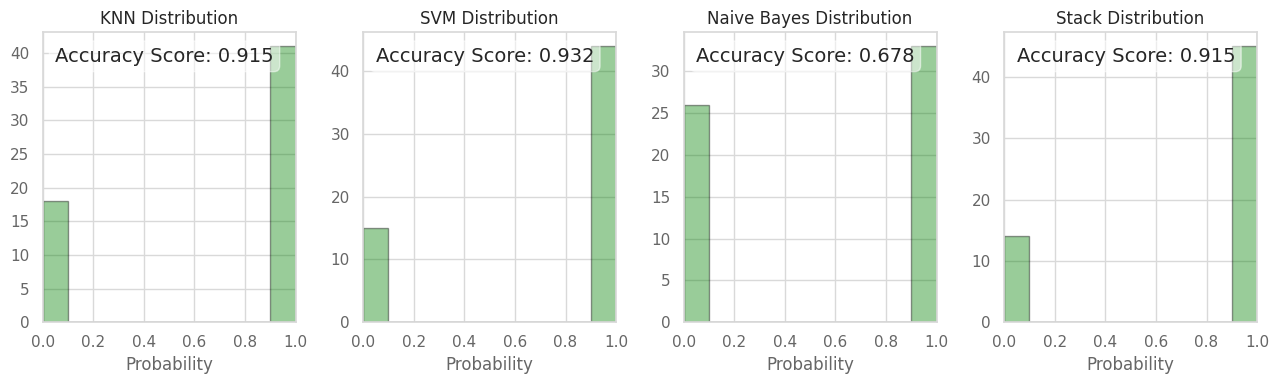

In [ ]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 4)

for key, counter in zip(classifiers, range(4)):
    # Get predictions
    y_pred = results[key]

    # Get Accuracy score
    auc = accuracy_score(y_test, y_pred)
    textstr = f"Accuracy Score: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False,
                 bins=int(10), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])

    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False,
                 bins=int(10), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])


    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)

    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

In [ ]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, y_pred))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, y_pred))

Classification report for the model is given as: 
               precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.89      1.00      0.94        40

    accuracy                           0.92        59
   macro avg       0.94      0.87      0.89        59
weighted avg       0.92      0.92      0.91        59

Accuracy obtained from the given model is: 0.9152542372881356


Thus, here we can say that even though we had stacked the models the overall accuracy against testing data of StackingClassifier (=91.5%) is less than that obtained by Support Vector Machine Classifier.

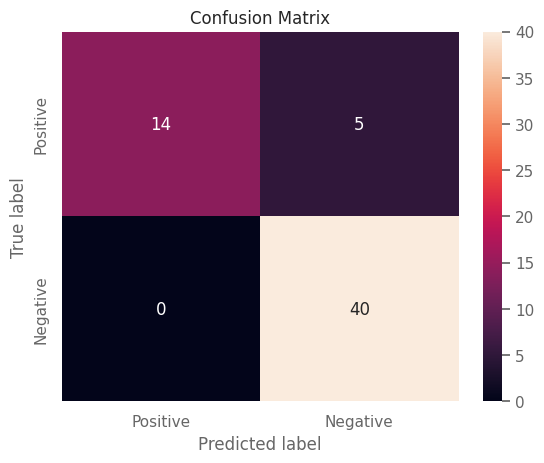

In [ ]:
# Confusion Matrix:

cm_sclf = confusion_matrix(y_test, y_pred)

class_label = ['Positive', 'Negative']
df_cm_sclf = pd.DataFrame(cm_sclf, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_sclf, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From the above Classification Matrix it is clear that the model has predicted 14 records as Positive which were actually positive and 5 records as False Positive. Also, the model had correctly identified 40 records as Negative. However, the model didn't predicted any negative item as positive.  

### 7. Train atleast one ensemble model and note the accuracy.

#### Decision Tree

In [ ]:
# Decision Tree with criterion = 'gini':
dTree_model = DecisionTreeClassifier(random_state = 1)
dTree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
pred_dTree = dTree_model.predict(X_test)
predictprob_dTree = dTree_model.predict_proba(X_test)

In [ ]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_dTree))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_dTree))

Classification report for the model is given as: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59

Accuracy obtained from the given model is: 0.8983050847457628


Thus, the accuracy obtained when DecisionTree Classifier is used with criterion = 'gini' is 89.83%

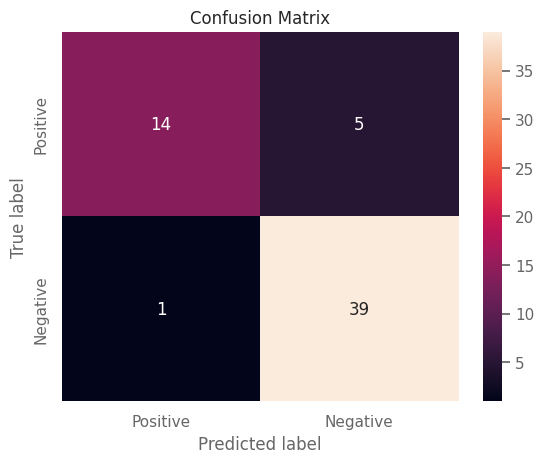

In [ ]:
# Confusion Matrix:
cm_dTree = confusion_matrix(y_test, pred_dTree)

class_label = ['Positive', 'Negative']
df_cm_dTree = pd.DataFrame(cm_dTree, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_dTree, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From the above Classification Matrix it is clear that the model has predicted 14 records as Positive which were actually positive and 5 records as False Positive. Also, the model had correctly identified 39 records as Negative and 1 negative record as positive.  

In [ ]:
train_char_label = ['No', 'Yes']
PD_Tree_File = open('parkinson_tree.dot','w')
dot_data = tree.export_graphviz(dTree_model, out_file = PD_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
PD_Tree_File.close()

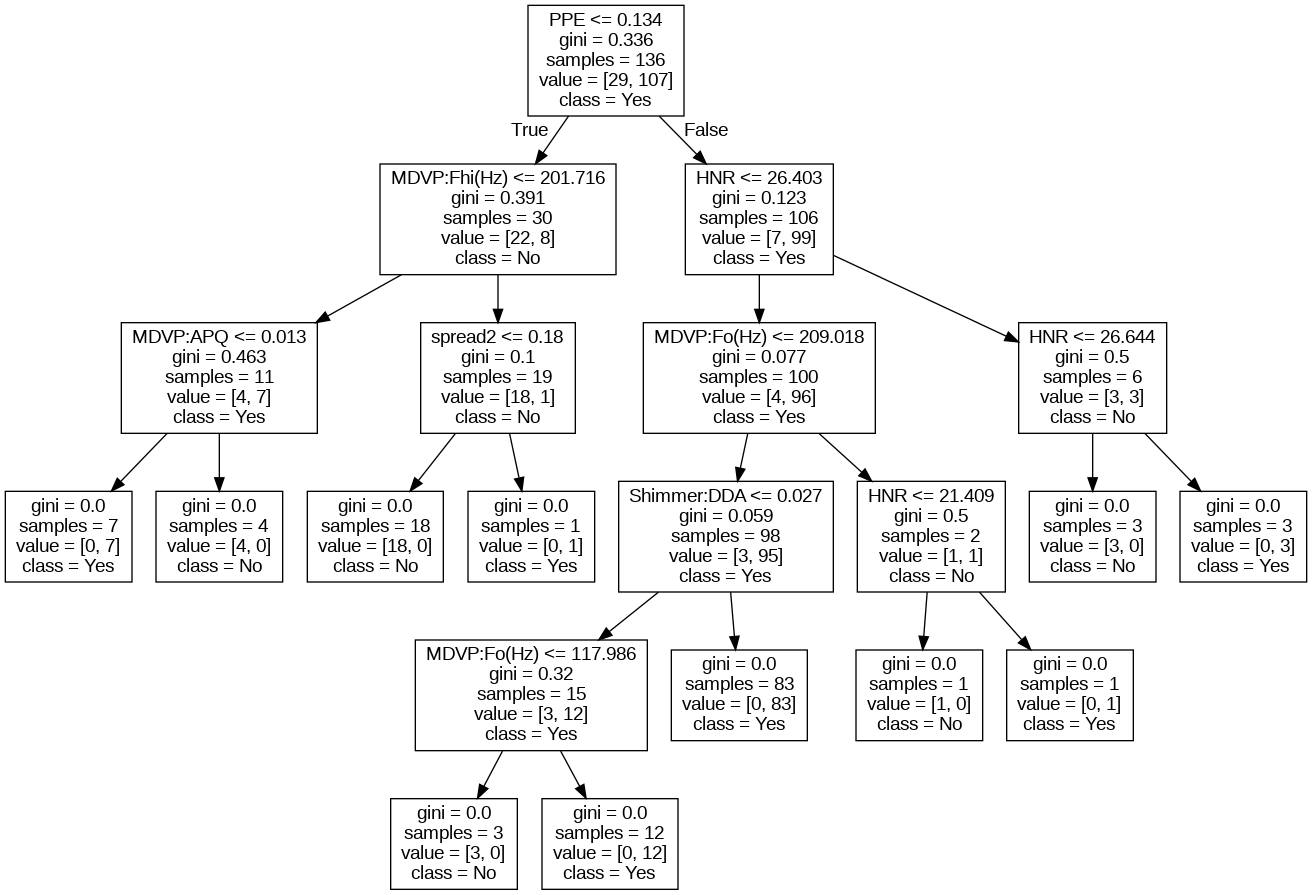

In [ ]:
retCode = system("dot -Tpng parkinson_tree.dot -o parkinson_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("parkinson_tree.png"))

#### Regularization of Decision Tree

Now, without pruning the Decision Tree we obtained a test accuracy of 89.83%. Now let us try to prune the decision tree by changing the value of the argument 'max_depth':

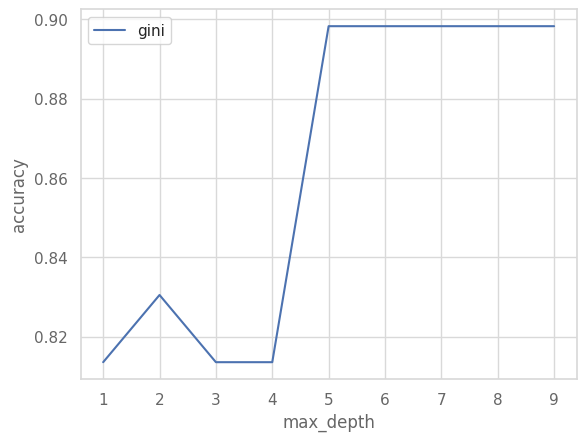

In [ ]:
max_depth = []
acc_gini = []

for i in range(1,10):
    modelR = DecisionTreeClassifier(criterion = 'gini', random_state = 1, max_depth = i)
    modelR.fit(X_train, y_train)
    pred = modelR.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))

    max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 'max_depth':pd.Series(max_depth)})

plt.plot('max_depth', 'acc_gini', data = d, label = 'gini')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

Here, we can see that after max_depth = 5, the accuracy plateaus. So, let us try to model our DecisionTree Model at max_depth = 5

In [ ]:
dTree_modelR = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dTree_modelR.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
pred_dTreeR = dTree_modelR.predict(X_test)
predictprob_dTreeR = dTree_modelR.predict_proba(X_test)

In [ ]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_dTreeR))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_dTreeR))

Classification report for the model is given as: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.89      0.97      0.93        40

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.89        59

Accuracy obtained from the given model is: 0.8983050847457628


Thus, we can see that even after pruning the model the acuracy remains the same.

#### Bagging

In [ ]:
bag_model = BaggingClassifier(base_estimator = dTree_model, random_state = 1)
bag_model.fit(X_train, y_train)

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
pred_bag = bag_model.predict(X_test)
predictprob_bag = bag_model.predict_proba(X_test)

In [ ]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_bag))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_bag))

Thus, the accuracy obtained in this case is 83.05%.

#### Regularization of Bagging Model

In [ ]:
num_est = np.arange(1,200)

for n_est in num_est:
    bag_clf = BaggingClassifier(base_estimator = dTree_model, n_estimators = n_est, random_state = 1)
    bag_clf = bag_clf.fit(X_train, y_train)
    pred = bag_clf.predict(X_test)
    print(n_est, "    ", accuracy_score(y_test, pred))

From above we can see that after 50 base estimators the accuracy reaches a plateau. So,

In [ ]:
bag_modelR = BaggingClassifier(base_estimator= dTree_model, n_estimators= 50, random_state = 1)
bag_modelR.fit(X_train, y_train)

In [ ]:
pred_bagR = bag_modelR.predict(X_test)
predictprob_bagR = bag_modelR.predict_proba(X_test)

In [ ]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_bagR))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_bagR))

Thus, on increaing the size of ensemble from 10 to 50, there has been a considerable increase in the accuracy of the model. The improved accuracy stands at 88.14%.

In [ ]:
# Confusion Matrix:
cm_bag = confusion_matrix(y_test, pred_bagR)

class_label = ['Positive', 'Negative']
df_cm_bag = pd.DataFrame(cm_bag, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_bag, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From the above Classification Matrix it is clear that the model has predicted 14 records as Positive which were actually positive and 5 records as False Positive. Also, the model had correctly identified 39 records as Negative and 1 negative record as positive.  

### Compare all the models and pick the best one among them

Before deciding which model (Logistic Regression, KNN, Naive Bayes, Support Vector Machine, StackingClassifier and BaggingClassifier) is best lets summarise the results from each of the model. All the six models had predicted 19 records as Positive (individuals not being affected by Parkinson) and 40 records as Negative (individuals being affected by Parkinson disease) with varying amount of True Positive, True Negative, False Positive and False Negative.

**Logistic Regression:**

This algorithm provided an accuracy of 86.44 %. For 19 records present in test data not being affected by Parkinson, it was able to correctly predict for 11 of them. For 40 records present in test data being affected by Parkinson it was able to correctly predict all of them.

**KNN (K-Nearest Neighbor):**

This algorithm provided an accuracy of 91.52%. For 19 records present in test data not being affected by Parkinson, it was able to correctly predict for 16 of them. For 40 records present in test data being affected by Parkinson it was able to correctly predict 38 of them. For 2 of the records (i.e., person suffering from Parkinson) it was unable to predict them.

**Naive Bayes:**

This algorithm provided an accuracy of 67.8%. For 19 records present in test data not being affected by Parkinson, it was able to correctly predict only 13 of them. For 40 records present in test data being affected by Parkinson it was able to correctly predict only 27 of them. It missed 13 records where the person was actually suffering from Parkinson.

**Support Vector Machine (SVC):**

This algorithm provided an accuracy of 93.22%. For 19 records present in test data not being affected by Parkinson, it was able to correctly predict 15 of them. For 40 records present in test data being affected by Parkinson it was able to correctly predict all 40 of them.

**StackingClassifier:**

This algorithm provided an accuracy of 91.5%. For 19 records present in test data not being affected by Parkinson, it was able to correctly predict 14 of them. For 40 records present in test data being affected by Parkinson it was able to correctly predict all 40 of them.

**Bagging Classifier:**

This algorithm provided an accuracy of 88.14%. For 19 records present in test data not being affected by Parkinson, it was able to correctly predict 14 of them. For 40 records present in test data being affected by Parkinson it was able to correctly predict 39 of them. It just missed 1 records where the person was actually suffering from Parkinson.

Thus, we can see that Support Vector Machine (SVC) has the best accuracy among all the six algorithms that has been used here. Apart from these it had also identified the most number of persons suffering from Parkinson correctly (alongwith StackingClassifier and Logistic Regression).

**Thus, in this case we can say that Support Vector Machine (SVC) is the best model out of the six.**
